# **Import**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings # Ignores any warning
warnings.filterwarnings("ignore")

In [2]:
plt.style.use('seaborn')
sns.set(rc={'figure.figsize':(15, 8)})

In [3]:
pd.set_option('display.max_columns', None)

In [4]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# **Modelling data Microsite**

`DataMicrositeFix02.csv`

In [5]:
df_mc = pd.read_csv("DataMicrositeFix02.csv")
df_mc

,createdAt,province,totalNotTestedProvince,totalAlreadyTestedProvince,totalCovidResultNegatifProvince,totalCovidResultPositifProvince,positifRate
0,2021-07-22,Maluku,13.0,0.0,13.0,0.0,0.000000
1,2021-07-22,Riau,47.0,118.0,162.0,3.0,0.025424
2,2021-07-22,Sulawesi Selatan,179.0,214.0,385.0,8.0,0.037383
3,2021-07-22,Kalimantan Selatan,65.0,335.0,396.0,4.0,0.011940
4,2021-07-22,Yogyakarta,54.0,168.0,211.0,11.0,0.065476
...,...,...,...,...,...,...,...
1024,2021-08-30,Bengkulu,16.0,120.0,136.0,0.0,0.000000
1025,2021-08-30,Kepulauan Riau,54.0,183.0,237.0,0.0,0.000000
1026,2021-08-30,Kalimantan Tengah,12.0,143.0,154.0,1.0,0.006993
1027,2021-08-30,Kalimantan Utara,15.0,71.0,86.0,0.0,0.000000


In [6]:
ambigu_column = ["positifRate"]
df_mc = df_mc.drop(ambigu_column,axis = 1)
df_mc.head()

,createdAt,province,totalNotTestedProvince,totalAlreadyTestedProvince,totalCovidResultNegatifProvince,totalCovidResultPositifProvince
0,2021-07-22,Maluku,13.0,0.0,13.0,0.0
1,2021-07-22,Riau,47.0,118.0,162.0,3.0
2,2021-07-22,Sulawesi Selatan,179.0,214.0,385.0,8.0
3,2021-07-22,Kalimantan Selatan,65.0,335.0,396.0,4.0
4,2021-07-22,Yogyakarta,54.0,168.0,211.0,11.0


In [7]:
df_mc["createdAt"] = pd.to_datetime(df_mc["createdAt"])

In [8]:
df_mc.columns

Index(['createdAt', 'province', 'totalNotTestedProvince',
       'totalAlreadyTestedProvince', 'totalCovidResultNegatifProvince',
       'totalCovidResultPositifProvince'],
      dtype='object')

In [9]:
np.sort(df_mc['createdAt'].unique())

array(['2021-07-22T00:00:00.000000000', '2021-07-23T00:00:00.000000000',
       '2021-07-24T00:00:00.000000000', '2021-07-25T00:00:00.000000000',
       '2021-07-26T00:00:00.000000000', '2021-07-27T00:00:00.000000000',
       '2021-07-28T00:00:00.000000000', '2021-07-29T00:00:00.000000000',
       '2021-07-30T00:00:00.000000000', '2021-08-01T00:00:00.000000000',
       '2021-08-02T00:00:00.000000000', '2021-08-03T00:00:00.000000000',
       '2021-08-04T00:00:00.000000000', '2021-08-05T00:00:00.000000000',
       '2021-08-06T00:00:00.000000000', '2021-08-07T00:00:00.000000000',
       '2021-08-08T00:00:00.000000000', '2021-08-09T00:00:00.000000000',
       '2021-08-10T00:00:00.000000000', '2021-08-11T00:00:00.000000000',
       '2021-08-12T00:00:00.000000000', '2021-08-13T00:00:00.000000000',
       '2021-08-14T00:00:00.000000000', '2021-08-16T00:00:00.000000000',
       '2021-08-17T00:00:00.000000000', '2021-08-18T00:00:00.000000000',
       '2021-08-19T00:00:00.000000000', '2021-08-20

In [10]:
df_mc.isna().sum()

createdAt                          0
province                           0
totalNotTestedProvince             0
totalAlreadyTestedProvince         0
totalCovidResultNegatifProvince    0
totalCovidResultPositifProvince    0
dtype: int64

In [11]:
df_mc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1029 entries, 0 to 1028
Data columns (total 6 columns):
 #   Column                           Non-Null Count  Dtype         
---  ------                           --------------  -----         
 0   createdAt                        1029 non-null   datetime64[ns]
 1   province                         1029 non-null   object        
 2   totalNotTestedProvince           1029 non-null   float64       
 3   totalAlreadyTestedProvince       1029 non-null   float64       
 4   totalCovidResultNegatifProvince  1029 non-null   float64       
 5   totalCovidResultPositifProvince  1029 non-null   float64       
dtypes: datetime64[ns](1), float64(4), object(1)
memory usage: 48.4+ KB


In [12]:
np.sort(df_mc["province"].unique())

array(['Aceh', 'Bali', 'Bangka Belitung', 'Bengkulu', 'Gorontalo',
       'Jakarta', 'Jambi', 'Jawa Barat', 'Jawa Tengah', 'Jawa Timur',
       'Kalimantan Barat', 'Kalimantan Selatan', 'Kalimantan Tengah',
       'Kalimantan Timur', 'Kalimantan Utara', 'Kepulauan Riau',
       'Lampung', 'Maluku', 'Maluku Utara', 'Nusa Tenggara Barat',
       'Nusa Tenggara Timur', 'Papua', 'Papua Barat', 'Riau',
       'Sulawesi Selatan', 'Sulawesi Tengah', 'Sulawesi Tenggara',
       'Sulawesi Utara', 'Sumatera Barat', 'Sumatera Selatan',
       'Sumatera Utara', 'Yogyakarta'], dtype=object)

In [13]:
np.sort(df_mc["createdAt"].unique())

array(['2021-07-22T00:00:00.000000000', '2021-07-23T00:00:00.000000000',
       '2021-07-24T00:00:00.000000000', '2021-07-25T00:00:00.000000000',
       '2021-07-26T00:00:00.000000000', '2021-07-27T00:00:00.000000000',
       '2021-07-28T00:00:00.000000000', '2021-07-29T00:00:00.000000000',
       '2021-07-30T00:00:00.000000000', '2021-08-01T00:00:00.000000000',
       '2021-08-02T00:00:00.000000000', '2021-08-03T00:00:00.000000000',
       '2021-08-04T00:00:00.000000000', '2021-08-05T00:00:00.000000000',
       '2021-08-06T00:00:00.000000000', '2021-08-07T00:00:00.000000000',
       '2021-08-08T00:00:00.000000000', '2021-08-09T00:00:00.000000000',
       '2021-08-10T00:00:00.000000000', '2021-08-11T00:00:00.000000000',
       '2021-08-12T00:00:00.000000000', '2021-08-13T00:00:00.000000000',
       '2021-08-14T00:00:00.000000000', '2021-08-16T00:00:00.000000000',
       '2021-08-17T00:00:00.000000000', '2021-08-18T00:00:00.000000000',
       '2021-08-19T00:00:00.000000000', '2021-08-20

In [14]:
df_mc.shape

(1029, 6)

## **Clustering K-Means**

**Importing Library**

In [15]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score,silhouette_samples
std=StandardScaler()

Standard Scaling since K-Means Clustering is a distance based alogrithm. 

In general, attribute scaling is important to be applied with K-means. Most of the time, the standard Euclidean distance is used (as a distance function of K-means) with the assumption that the attributes are normalized. 

In [16]:
X=df_mc[['totalNotTestedProvince',
       'totalAlreadyTestedProvince', 
       'totalCovidResultNegatifProvince',
       'totalCovidResultPositifProvince']]
#Standard Scaling since K-Means Clustering is a distance based alogrithm
X=std.fit_transform(X)

**Calculating k numbers using Elbow and Silhouette**

In [17]:
wcss=[]
sil=[]
for i in range(2,11):
    clf=KMeans(n_clusters=i,init='k-means++',random_state=42)
    clf.fit(X)
    labels=clf.labels_
    centroids=clf.cluster_centers_
    sil.append(silhouette_score(X, labels, metric='euclidean'))
    wcss.append(clf.inertia_)

**Importing Visualization Library**

*   Matplotlib adalah pustaka visualisasi data multiplatform yang dibangun di atas array NumPy

*   NumPy (Numerical Python) adalah library Python yang fokus pada scientific computing. 

In [18]:
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

Text(0.5, 1.0, 'Silhouette Score Method')

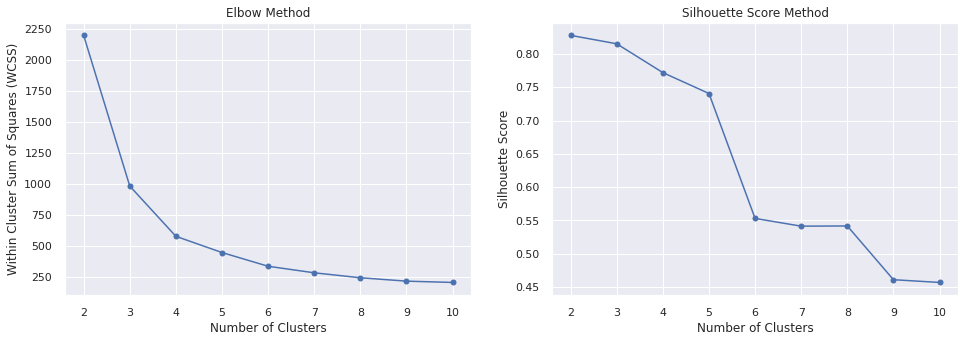

In [19]:
fig, (ax1, ax2) = plt.subplots(1, 2,figsize=(16,5))
x=np.arange(2,11)
ax1.plot(x,wcss,marker='o')
ax1.set_xlabel("Number of Clusters")
ax1.set_ylabel("Within Cluster Sum of Squares (WCSS)")
ax1.set_title("Elbow Method")
x=np.arange(2,11)
ax2.plot(x,sil,marker='o')
ax2.set_xlabel("Number of Clusters")
ax2.set_ylabel("Silhouette Score")
ax2.set_title("Silhouette Score Method")

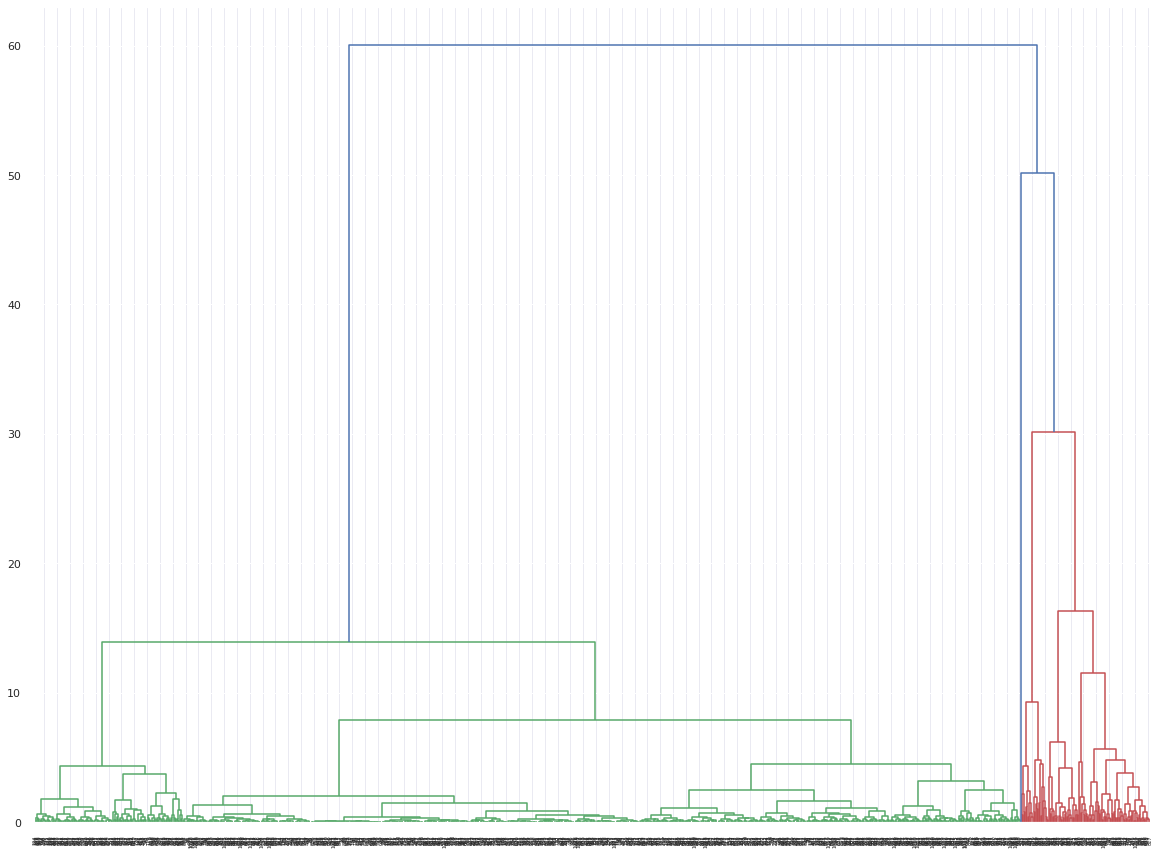

In [20]:
import scipy.cluster.hierarchy as sch
plt.figure(figsize=(20,15))
dendogram=sch.dendrogram(sch.linkage(X, method  = "ward"))

In [21]:
clf_final=KMeans(n_clusters=3,init='k-means++',random_state=6)
clf_final.fit(X)

KMeans(n_clusters=3, random_state=6)

In [22]:
df_mc["Clusters"]=clf_final.predict(X)

**Summary of Clusters**

In [23]:
df_mc["Clusters"].value_counts()

0    943
1     85
2      1
Name: Clusters, dtype: int64

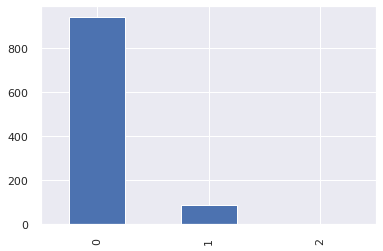

In [24]:
df_mc.Clusters.value_counts().plot.bar()

In [25]:
df_mc.columns

Index(['createdAt', 'province', 'totalNotTestedProvince',
       'totalAlreadyTestedProvince', 'totalCovidResultNegatifProvince',
       'totalCovidResultPositifProvince', 'Clusters'],
      dtype='object')

In [26]:
cluster_summary=pd.concat([
                           df_mc[df_mc["Clusters"]==2].head(15),
                           df_mc[df_mc["Clusters"]==1].head(15),
                           df_mc[df_mc["Clusters"]==0].head(15)])
cluster_summary.style.background_gradient(cmap='Reds')

,createdAt,province,totalNotTestedProvince,totalAlreadyTestedProvince,totalCovidResultNegatifProvince,totalCovidResultPositifProvince,Clusters
240,2021-08-02 00:00:00,Jakarta,686.000000,54625.000000,55249.000000,62.000000,2
77,2021-07-25 00:00:00,Jakarta,462.000000,636.000000,1059.000000,39.000000,1
93,2021-07-26 00:00:00,Bali,1203.000000,846.000000,2025.000000,24.000000,1
114,2021-07-27 00:00:00,Jakarta,596.000000,1503.000000,2036.000000,63.000000,1
116,2021-07-27 00:00:00,Bali,872.000000,997.000000,1842.000000,27.000000,1
141,2021-07-28 00:00:00,Bali,1066.000000,675.000000,1725.000000,16.000000,1
146,2021-07-28 00:00:00,Jakarta,619.000000,1627.000000,2197.000000,49.000000,1
166,2021-07-29 00:00:00,Jakarta,590.000000,1528.000000,2049.000000,69.000000,1
178,2021-07-29 00:00:00,Bali,600.000000,655.000000,1224.000000,31.000000,1
191,2021-07-30 00:00:00,Jakarta,633.000000,2222.000000,2774.000000,81.000000,1


### **totalNotTestedProvince**

In [27]:
print("Average totalNotTestedProvince of Cluster 0: ",df_mc[df_mc["Clusters"]==0]["totalNotTestedProvince"].mean())
print("Average totalNotTestedProvince of Cluster 1: ",df_mc[df_mc["Clusters"]==1]["totalNotTestedProvince"].mean())
print("Average totalNotTestedProvince of Cluster 2: ",df_mc[df_mc["Clusters"]==2]["totalNotTestedProvince"].mean())

Average totalNotTestedProvince of Cluster 0:  62.2237539766702
Average totalNotTestedProvince of Cluster 1:  865.6823529411764
Average totalNotTestedProvince of Cluster 2:  686.0


### **totalAlreadyTestedProvince**

In [28]:
print("Average totalAlreadyTestedProvince of Cluster 0: ",df_mc[df_mc["Clusters"]==0]["totalAlreadyTestedProvince"].mean())
print("Average totalAlreadyTestedProvince of Cluster 1: ",df_mc[df_mc["Clusters"]==1]["totalAlreadyTestedProvince"].mean())
print("Average totalAlreadyTestedProvince of Cluster 2: ",df_mc[df_mc["Clusters"]==2]["totalAlreadyTestedProvince"].mean())

Average totalAlreadyTestedProvince of Cluster 0:  319.04559915164367
Average totalAlreadyTestedProvince of Cluster 1:  3116.8470588235296
Average totalAlreadyTestedProvince of Cluster 2:  54625.0


### **totalCovidResultNegatifProvince**

In [29]:
print("Average totalCovidResultNegatifProvince of Cluster 0: ",df_mc[df_mc["Clusters"]==0]["totalCovidResultNegatifProvince"].mean())
print("Average totalCovidResultNegatifProvince of Cluster 1: ",df_mc[df_mc["Clusters"]==1]["totalCovidResultNegatifProvince"].mean())
print("Average totalCovidResultNegatifProvince of Cluster 2: ",df_mc[df_mc["Clusters"]==2]["totalCovidResultNegatifProvince"].mean())

Average totalCovidResultNegatifProvince of Cluster 0:  375.51749734888654
Average totalCovidResultNegatifProvince of Cluster 1:  3929.6
Average totalCovidResultNegatifProvince of Cluster 2:  55249.0


### **totalCovidResultPositifProvince**

In [30]:
print("Average totalCovidResultPositifProvince of Cluster 0: ",df_mc[df_mc["Clusters"]==0]["totalCovidResultPositifProvince"].mean())
print("Average totalCovidResultPositifProvince of Cluster 1: ",df_mc[df_mc["Clusters"]==1]["totalCovidResultPositifProvince"].mean())
print("Average totalCovidResultPositifProvince of Cluster 2: ",df_mc[df_mc["Clusters"]==2]["totalCovidResultPositifProvince"].mean())

Average totalCovidResultPositifProvince of Cluster 0:  5.75185577942736
Average totalCovidResultPositifProvince of Cluster 1:  52.92941176470588
Average totalCovidResultPositifProvince of Cluster 2:  62.0


### **positifRate**

In [31]:
# print("Average positifRate of Cluster 0: ",df_mc[df_mc["Clusters"]==0]["positifRate"].mean())
# print("Average positifRate of Cluster 1: ",df_mc[df_mc["Clusters"]==1]["positifRate"].mean())
# print("Average positifRate of Cluster 2: ",df_mc[df_mc["Clusters"]==2]["positifRate"].mean())

In [32]:
import seaborn as sns

Seaborn merupakan pustaka visualisasi data pada lingkungan Python ber- sifat sumber terbuka yang berlisensi BSD dan dibangun di atas pustaka matplotlib. Seaborn akan mempermudah kita sebagai analis data untuk memproduksi visualisasi yang indah tanpa kostumisasi rumit seperti yang kita hadapi pada matplotlib.

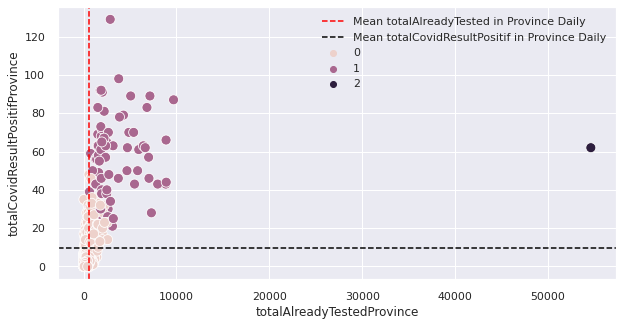

In [33]:
plt.figure(figsize=(10,5))
sns.scatterplot(x=df_mc["totalAlreadyTestedProvince"],y=df_mc["totalCovidResultPositifProvince"],hue=df_mc["Clusters"],s=100)
plt.axvline((df_mc["totalAlreadyTestedProvince"]).mean(),color='red',linestyle="--",label="Mean totalAlreadyTested in Province Daily")
plt.axhline((df_mc["totalCovidResultPositifProvince"]).mean(),color='black',linestyle="--",label="Mean totalCovidResultPositif in Province Daily")
plt.legend()

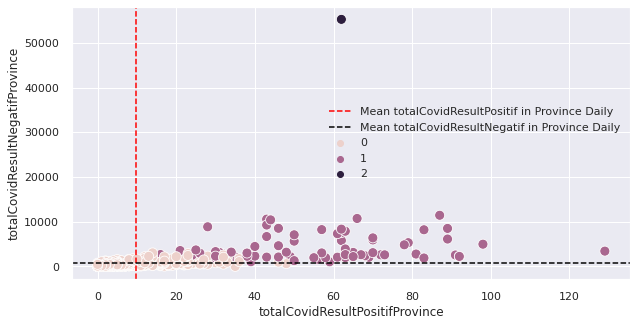

In [34]:
plt.figure(figsize=(10,5))
sns.scatterplot(x=df_mc["totalCovidResultPositifProvince"],y=df_mc["totalCovidResultNegatifProvince"],hue=df_mc["Clusters"],s=100)
plt.axvline((df_mc["totalCovidResultPositifProvince"]).mean(),color='red',linestyle="--",label="Mean totalCovidResultPositif in Province Daily")
plt.axhline((df_mc["totalCovidResultNegatifProvince"]).mean(),color='black',linestyle="--",label="Mean totalCovidResultNegatif in Province Daily")
plt.legend()

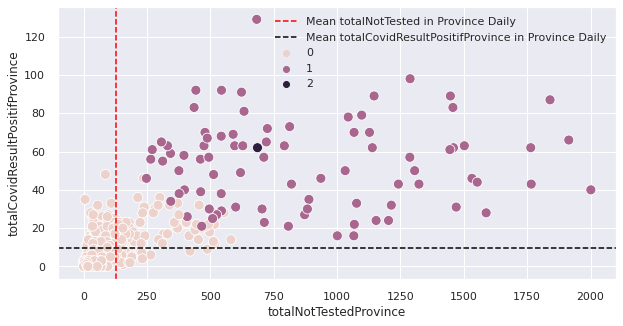

In [35]:
plt.figure(figsize=(10,5))
sns.scatterplot(x=df_mc["totalNotTestedProvince"],y=df_mc["totalCovidResultPositifProvince"],hue=df_mc["Clusters"],s=100)
plt.axvline((df_mc["totalNotTestedProvince"]).mean(),color='red',linestyle="--",label="Mean totalNotTested in Province Daily")
plt.axhline((df_mc["totalCovidResultPositifProvince"]).mean(),color='black',linestyle="--",label="Mean totalCovidResultPositifProvince in Province Daily")
plt.legend()

In [36]:
# plt.figure(figsize=(10,5))
# sns.scatterplot(x=df_mc["totalNotTestedProvince"],y=df_mc["positifRate"],hue=df_mc["Clusters"],s=100)
# plt.axvline((df_mc["totalNotTestedProvince"]).mean(),color='red',linestyle="--",label="Mean totalNotTested in Province Daily")
# plt.axhline((df_mc["positifRate"]).mean(),color='black',linestyle="--",label="Mean positifRate in Province Daily")
# plt.legend()

In [37]:
# print("Few Province belonging to Cluster 0: ",str(set(df_mc[df_mc["Clusters"]==0].head(10).province)))
# print("Few Province belonging to Cluster 1: ",str(set(df_mc[df_mc["Clusters"]==1].head(10).province)))
# print("Few Province belonging to Cluster 2: ",str(set(df_mc[df_mc["Clusters"]==2].head(10).province)))
print("Few Province belonging to Cluster 0: ",str(set(df_mc[df_mc["Clusters"]==0].province)))
print("Few Province belonging to Cluster 1: ",str(set(df_mc[df_mc["Clusters"]==1].province)))
print("Few Province belonging to Cluster 2: ",str(set(df_mc[df_mc["Clusters"]==2].province)))

Few Province belonging to Cluster 0:  {'Maluku', 'Kalimantan Timur', 'Nusa Tenggara Barat', 'Gorontalo', 'Sulawesi Utara', 'Jawa Tengah', 'Bangka Belitung', 'Sulawesi Tenggara', 'Lampung', 'Aceh', 'Kalimantan Utara', 'Sulawesi Tengah', 'Papua', 'Kalimantan Barat', 'Riau', 'Papua Barat', 'Nusa Tenggara Timur', 'Kepulauan Riau', 'Jawa Timur', 'Bengkulu', 'Yogyakarta', 'Jakarta', 'Kalimantan Selatan', 'Sumatera Selatan', 'Sumatera Utara', 'Jawa Barat', 'Bali', 'Sumatera Barat', 'Sulawesi Selatan', 'Jambi', 'Maluku Utara', 'Kalimantan Tengah'}
Few Province belonging to Cluster 1:  {'Sulawesi Selatan', 'Jakarta', 'Jawa Timur', 'Bali'}
Few Province belonging to Cluster 2:  {'Jakarta'}


### **PCA**

In [38]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
result = df_mc.copy()
columns = ['totalNotTestedProvince', 'totalAlreadyTestedProvince', 'totalCovidResultNegatifProvince', 'totalCovidResultPositifProvince']
for i in columns:
  result[i] = sc.fit_transform(result[[i]])

In [39]:
from sklearn.decomposition import PCA
# reduce dimension
pca = PCA(n_components=2)
pca_feat = pca.fit_transform(result[columns])
pca_feat

array([[-0.81960823,  0.25770061],
       [-0.6050356 ,  0.14994977],
       [-0.14405678, -0.19347374],
       ...,
       [-0.7205628 ,  0.2882402 ],
       [-0.77930993,  0.28684135],
       [-0.58710735,  0.45144838]])

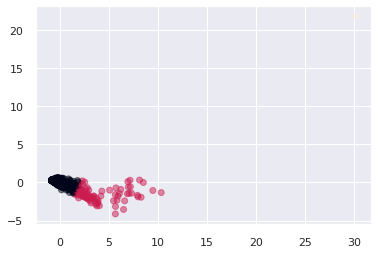

<Figure size 1440x1440 with 0 Axes>

In [40]:
plt.scatter(x=pca_feat[:,0], y=pca_feat[:,1], c=result['Clusters'], alpha=0.5)
plt.figure(figsize=(20,20))
plt.show()

In [41]:
avg_cluster = result.groupby(by='Clusters').mean()
avg_cluster.reset_index(inplace=True)
avg_cluster

,Clusters,totalNotTestedProvince,totalAlreadyTestedProvince,totalCovidResultNegatifProvince,totalCovidResultPositifProvince
0,0,-0.249840,-0.142064,-0.161927,-0.245331
1,1,2.747320,1.258026,1.497008,2.683538
2,2,2.077047,27.034001,25.451295,3.246657


### **Radar chart**

In [42]:
from math import pi

def plot_radar_df(df, feat_cols, label_col, selected_label_list, split_chart=False, dpi=100, n_cols = 3, fig_h=8, fig_w=8):
    
    # min-max normalization
    for col in feat_cols:
        df[col] = (df[col] - df[col].min()) / (df[col].max() - df[col].min())
    
    # select data:
    row_idx = df[label_col].isin(selected_label_list)
    data = df[row_idx]
    data = data[feat_cols].values

    # number of variable
    N = len(feat_cols)

    # angle of each axis in the plot
    angles = [n / float(N) * 2 * pi for n in range(N)]
    angles += angles[:1]

    # set color
    my_color = plt.cm.get_cmap("Set2", len(df.index))

    # set font size and subplot
    if not split_chart:
        ax = plt.subplot(111, polar=True )
        size = 10
    else:
        size = 5
        dpi = 1.5*dpi

    for i in range(len(data)):

        title = label_col +'_' +str(selected_label_list[i])

        # Initialise the spider plot
        if split_chart:
            n_rows = np.ceil(len(df)/n_cols)
            ax = plt.subplot(n_rows,n_cols,i+1, polar=True )

        # If you want the first axis to be on top:
        ax.set_theta_offset(pi / 2)
        ax.set_theta_direction(-1)

        # Draw one axe per variable + add labels labels yet
        plt.xticks(angles[:-1], feat_cols, color='grey', size=int(size*0.8))

        # Draw ylabels
        ax.set_rlabel_position(0)
        plt.yticks([0.20, 0.4, 0.6, 0.8,  1], \
                   ["20%","40%","60%","80%","100%"], color="grey", size=size)
        plt.ylim(0,1)

        # Plot
        values = list(data[i,:])
        values += values[:1]
        ax.plot(angles, values, color=my_color(i), linewidth=2, linestyle='solid', label=title)
        ax.fill(angles, values, color=my_color(i), alpha=0.4)

        # Add a title or legend
        if split_chart:
            plt.title(title, size=11, color=my_color(i), y=1.2)
        else:
            plt.legend(loc='best', bbox_to_anchor=(0.1, 0.1))

        # Adjust DPI
        fig = plt.gcf()
        fig.set_dpi(dpi)
        fig.set_figheight(fig_h)
        fig.set_figwidth(fig_w)

    plt.tight_layout()
    plt.show()

In [43]:
avg_cluster.columns

Index(['Clusters', 'totalNotTestedProvince', 'totalAlreadyTestedProvince',
       'totalCovidResultNegatifProvince', 'totalCovidResultPositifProvince'],
      dtype='object')

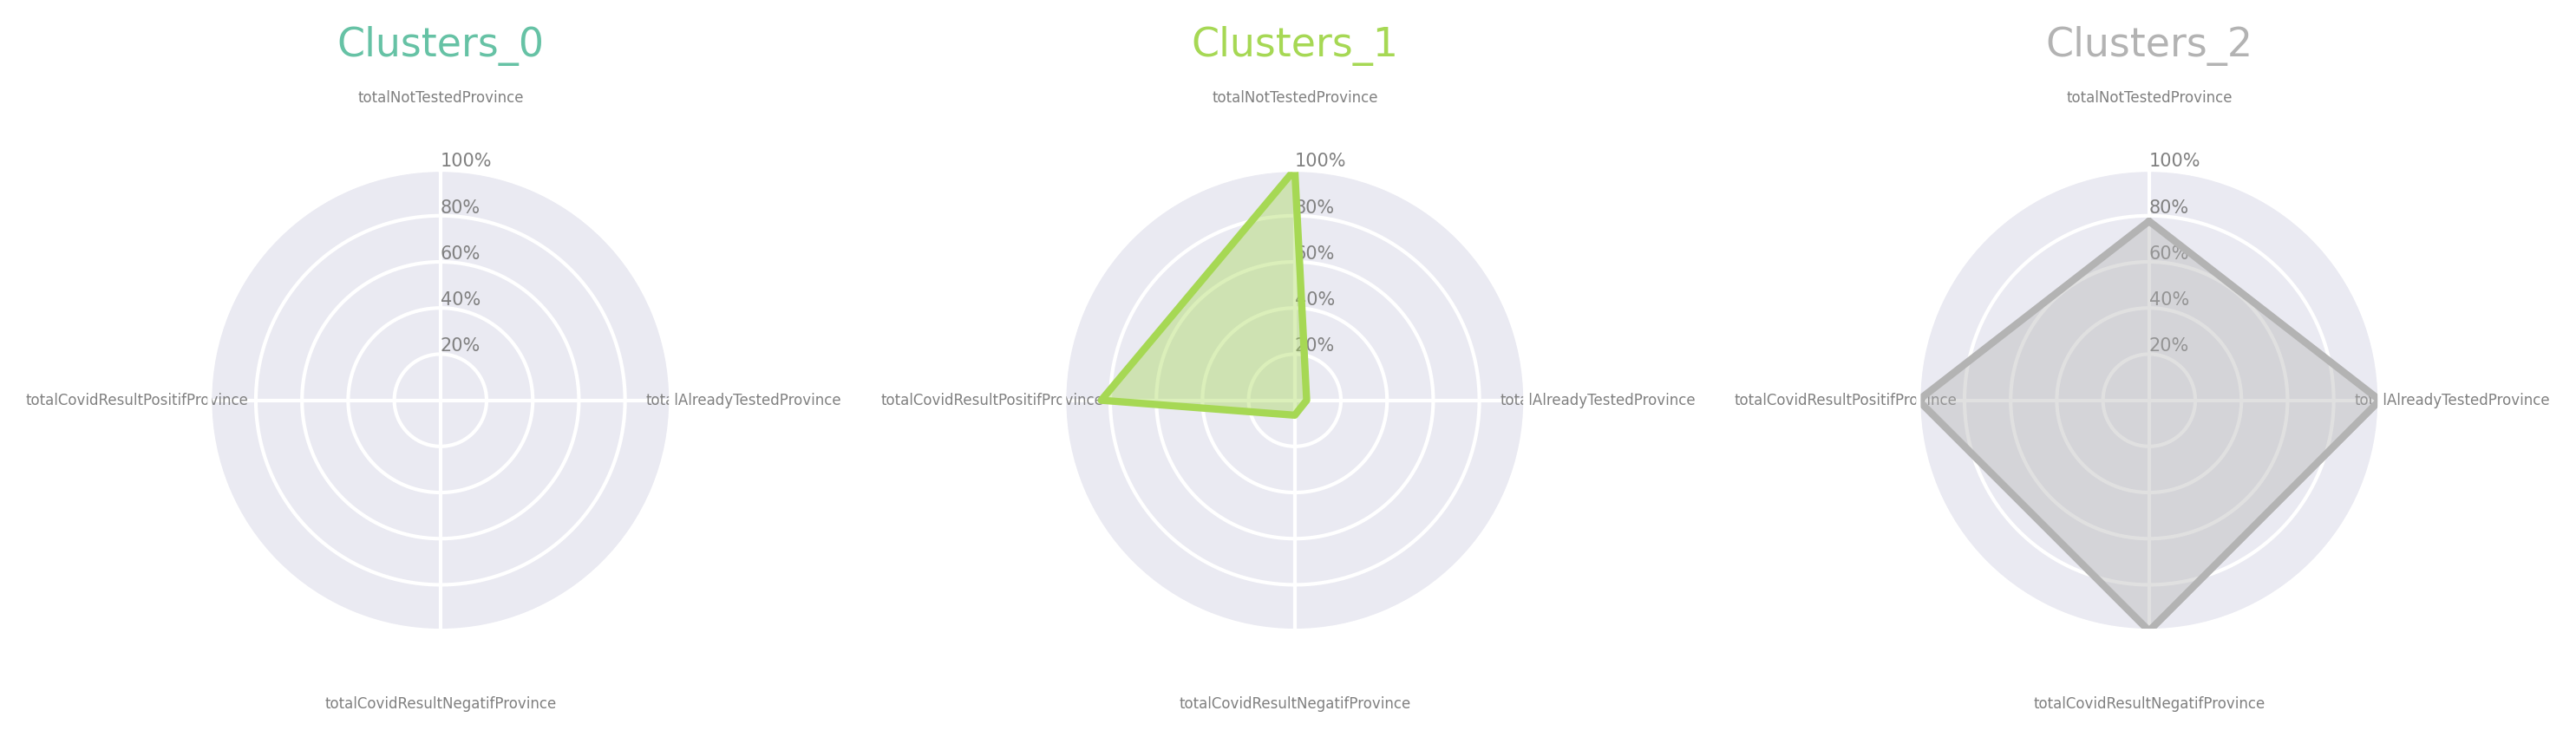

In [44]:
feat_cols = [
       'totalNotTestedProvince', 'totalAlreadyTestedProvince',
       'totalCovidResultNegatifProvince', 'totalCovidResultPositifProvince'
       ]

label_col = 'Clusters'
selected_label_list = [i for i in range(8)]

plot_radar_df(avg_cluster, feat_cols, label_col, selected_label_list, split_chart=True, dpi=200, n_cols=3, fig_h=10, fig_w=10)

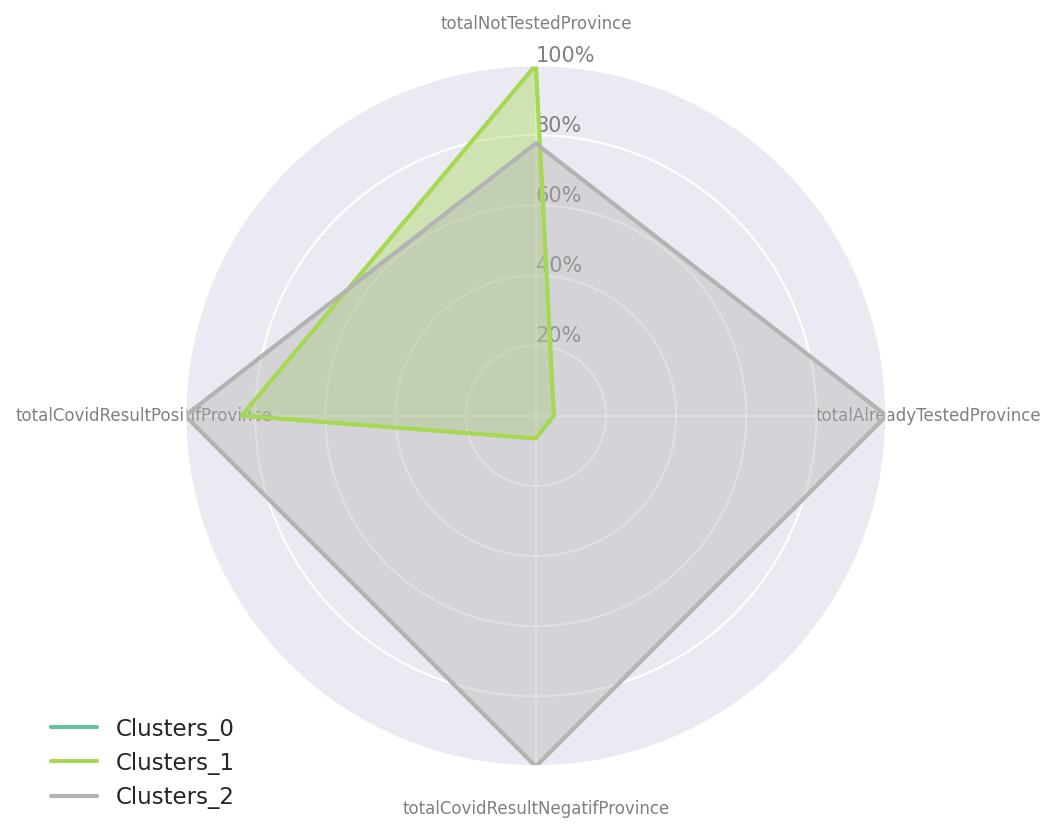

In [45]:
label_col = 'Clusters'
selected_label_list = [i for i in range(8)]

plot_radar_df(avg_cluster, feat_cols, label_col, selected_label_list, split_chart=False, dpi=150, n_cols=3, fig_h=7, fig_w=7)

* `Cluster 0` is ------------- 

    Rekomendation : 

* `Cluster 1` is ------------- 

    Rekomendation : 

* `Cluster 2` is ------------- 

    Rekomendation : 

* `Cluster 3` is ------------- 

    Rekomendation : 



# **Modelling data Microsite 02 [By Only Province]**

`DataMicrositeFix02.csv`

In [46]:
df_mc = pd.read_csv("DataMicrositeFix02.csv")
df_mc

,createdAt,province,totalNotTestedProvince,totalAlreadyTestedProvince,totalCovidResultNegatifProvince,totalCovidResultPositifProvince,positifRate
0,2021-07-22,Maluku,13.0,0.0,13.0,0.0,0.000000
1,2021-07-22,Riau,47.0,118.0,162.0,3.0,0.025424
2,2021-07-22,Sulawesi Selatan,179.0,214.0,385.0,8.0,0.037383
3,2021-07-22,Kalimantan Selatan,65.0,335.0,396.0,4.0,0.011940
4,2021-07-22,Yogyakarta,54.0,168.0,211.0,11.0,0.065476
...,...,...,...,...,...,...,...
1024,2021-08-30,Bengkulu,16.0,120.0,136.0,0.0,0.000000
1025,2021-08-30,Kepulauan Riau,54.0,183.0,237.0,0.0,0.000000
1026,2021-08-30,Kalimantan Tengah,12.0,143.0,154.0,1.0,0.006993
1027,2021-08-30,Kalimantan Utara,15.0,71.0,86.0,0.0,0.000000


In [47]:
ambigu_column = ["positifRate"]
df_mc = df_mc.drop(ambigu_column,axis = 1)
df_mc.head()

,createdAt,province,totalNotTestedProvince,totalAlreadyTestedProvince,totalCovidResultNegatifProvince,totalCovidResultPositifProvince
0,2021-07-22,Maluku,13.0,0.0,13.0,0.0
1,2021-07-22,Riau,47.0,118.0,162.0,3.0
2,2021-07-22,Sulawesi Selatan,179.0,214.0,385.0,8.0
3,2021-07-22,Kalimantan Selatan,65.0,335.0,396.0,4.0
4,2021-07-22,Yogyakarta,54.0,168.0,211.0,11.0


In [48]:
df_mc["createdAt"] = pd.to_datetime(df_mc["createdAt"])

In [49]:
df_mc.columns

Index(['createdAt', 'province', 'totalNotTestedProvince',
       'totalAlreadyTestedProvince', 'totalCovidResultNegatifProvince',
       'totalCovidResultPositifProvince'],
      dtype='object')

In [50]:
np.sort(df_mc['createdAt'].unique())

array(['2021-07-22T00:00:00.000000000', '2021-07-23T00:00:00.000000000',
       '2021-07-24T00:00:00.000000000', '2021-07-25T00:00:00.000000000',
       '2021-07-26T00:00:00.000000000', '2021-07-27T00:00:00.000000000',
       '2021-07-28T00:00:00.000000000', '2021-07-29T00:00:00.000000000',
       '2021-07-30T00:00:00.000000000', '2021-08-01T00:00:00.000000000',
       '2021-08-02T00:00:00.000000000', '2021-08-03T00:00:00.000000000',
       '2021-08-04T00:00:00.000000000', '2021-08-05T00:00:00.000000000',
       '2021-08-06T00:00:00.000000000', '2021-08-07T00:00:00.000000000',
       '2021-08-08T00:00:00.000000000', '2021-08-09T00:00:00.000000000',
       '2021-08-10T00:00:00.000000000', '2021-08-11T00:00:00.000000000',
       '2021-08-12T00:00:00.000000000', '2021-08-13T00:00:00.000000000',
       '2021-08-14T00:00:00.000000000', '2021-08-16T00:00:00.000000000',
       '2021-08-17T00:00:00.000000000', '2021-08-18T00:00:00.000000000',
       '2021-08-19T00:00:00.000000000', '2021-08-20

In [51]:
df_mc.isna().sum()

createdAt                          0
province                           0
totalNotTestedProvince             0
totalAlreadyTestedProvince         0
totalCovidResultNegatifProvince    0
totalCovidResultPositifProvince    0
dtype: int64

In [52]:
df_mc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1029 entries, 0 to 1028
Data columns (total 6 columns):
 #   Column                           Non-Null Count  Dtype         
---  ------                           --------------  -----         
 0   createdAt                        1029 non-null   datetime64[ns]
 1   province                         1029 non-null   object        
 2   totalNotTestedProvince           1029 non-null   float64       
 3   totalAlreadyTestedProvince       1029 non-null   float64       
 4   totalCovidResultNegatifProvince  1029 non-null   float64       
 5   totalCovidResultPositifProvince  1029 non-null   float64       
dtypes: datetime64[ns](1), float64(4), object(1)
memory usage: 48.4+ KB


In [53]:
np.sort(df_mc["province"].unique())

array(['Aceh', 'Bali', 'Bangka Belitung', 'Bengkulu', 'Gorontalo',
       'Jakarta', 'Jambi', 'Jawa Barat', 'Jawa Tengah', 'Jawa Timur',
       'Kalimantan Barat', 'Kalimantan Selatan', 'Kalimantan Tengah',
       'Kalimantan Timur', 'Kalimantan Utara', 'Kepulauan Riau',
       'Lampung', 'Maluku', 'Maluku Utara', 'Nusa Tenggara Barat',
       'Nusa Tenggara Timur', 'Papua', 'Papua Barat', 'Riau',
       'Sulawesi Selatan', 'Sulawesi Tengah', 'Sulawesi Tenggara',
       'Sulawesi Utara', 'Sumatera Barat', 'Sumatera Selatan',
       'Sumatera Utara', 'Yogyakarta'], dtype=object)

In [54]:
np.sort(df_mc["createdAt"].unique())

array(['2021-07-22T00:00:00.000000000', '2021-07-23T00:00:00.000000000',
       '2021-07-24T00:00:00.000000000', '2021-07-25T00:00:00.000000000',
       '2021-07-26T00:00:00.000000000', '2021-07-27T00:00:00.000000000',
       '2021-07-28T00:00:00.000000000', '2021-07-29T00:00:00.000000000',
       '2021-07-30T00:00:00.000000000', '2021-08-01T00:00:00.000000000',
       '2021-08-02T00:00:00.000000000', '2021-08-03T00:00:00.000000000',
       '2021-08-04T00:00:00.000000000', '2021-08-05T00:00:00.000000000',
       '2021-08-06T00:00:00.000000000', '2021-08-07T00:00:00.000000000',
       '2021-08-08T00:00:00.000000000', '2021-08-09T00:00:00.000000000',
       '2021-08-10T00:00:00.000000000', '2021-08-11T00:00:00.000000000',
       '2021-08-12T00:00:00.000000000', '2021-08-13T00:00:00.000000000',
       '2021-08-14T00:00:00.000000000', '2021-08-16T00:00:00.000000000',
       '2021-08-17T00:00:00.000000000', '2021-08-18T00:00:00.000000000',
       '2021-08-19T00:00:00.000000000', '2021-08-20

In [55]:
df_mc.shape

(1029, 6)

## **Group By Province**

In [56]:
df_mc.groupby(['province']).agg(
    totalNotTestedProvince = ('totalNotTestedProvince', "sum"),
    totalAlreadyTestedProvince = ('totalAlreadyTestedProvince', "sum") ,
    totalCovidResultNegatifProvince = ('totalCovidResultNegatifProvince', "sum"),
    totalCovidResultPositifProvince = ('totalCovidResultPositifProvince', "sum"),
)

,totalNotTestedProvince,totalAlreadyTestedProvince,totalCovidResultNegatifProvince,totalCovidResultPositifProvince
province,,,,
Aceh,826.0,3947.0,4712.0,61.0
Bali,26635.0,46349.0,72113.0,871.0
Bangka Belitung,2318.0,12751.0,14884.0,185.0
Bengkulu,566.0,3384.0,3885.0,65.0
Gorontalo,34.0,456.0,472.0,18.0
Jakarta,41039.0,228386.0,267215.0,2210.0
Jambi,1577.0,9943.0,11406.0,114.0
Jawa Barat,631.0,2808.0,3387.0,52.0
Jawa Tengah,3238.0,19650.0,22479.0,409.0


In [57]:
df_mc_prov = df_mc.groupby(['province']).agg(
    totalNotTestedProvince = ('totalNotTestedProvince', "sum"),
    totalAlreadyTestedProvince = ('totalAlreadyTestedProvince', "sum") ,
    totalCovidResultNegatifProvince = ('totalCovidResultNegatifProvince', "sum"),
    totalCovidResultPositifProvince = ('totalCovidResultPositifProvince', "sum"),
).reset_index()

In [58]:
# df_mc_prov["positifRate"] = df_mc_prov['totalCovidResultPositifProvince']/df_mc_prov['totalAlreadyTestedProvince']
df_mc_prov.head()

,province,totalNotTestedProvince,totalAlreadyTestedProvince,totalCovidResultNegatifProvince,totalCovidResultPositifProvince
0,Aceh,826.0,3947.0,4712.0,61.0
1,Bali,26635.0,46349.0,72113.0,871.0
2,Bangka Belitung,2318.0,12751.0,14884.0,185.0
3,Bengkulu,566.0,3384.0,3885.0,65.0
4,Gorontalo,34.0,456.0,472.0,18.0


## **Clustering K-Means**

**Importing Library**

In [59]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score,silhouette_samples
std=StandardScaler()

Standard Scaling since K-Means Clustering is a distance based alogrithm. 

In general, attribute scaling is important to be applied with K-means. Most of the time, the standard Euclidean distance is used (as a distance function of K-means) with the assumption that the attributes are normalized. 

In [60]:
X=df_mc_prov[['totalNotTestedProvince',
       'totalAlreadyTestedProvince', 'totalCovidResultNegatifProvince',
       'totalCovidResultPositifProvince']]
#Standard Scaling since K-Means Clustering is a distance based alogrithm
X=std.fit_transform(X)

**Calculating k numbers using Elbow and Silhouette**

In [61]:
wcss=[]
sil=[]
for i in range(2,11):
    clf=KMeans(n_clusters=i,init='k-means++',random_state=42)
    clf.fit(X)
    labels=clf.labels_
    centroids=clf.cluster_centers_
    sil.append(silhouette_score(X, labels, metric='euclidean'))
    wcss.append(clf.inertia_)

**Importing Visualization Library**

*   Matplotlib adalah pustaka visualisasi data multiplatform yang dibangun di atas array NumPy

*   NumPy (Numerical Python) adalah library Python yang fokus pada scientific computing. 

In [62]:
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

Text(0.5, 1.0, 'Silhouette Score Method')

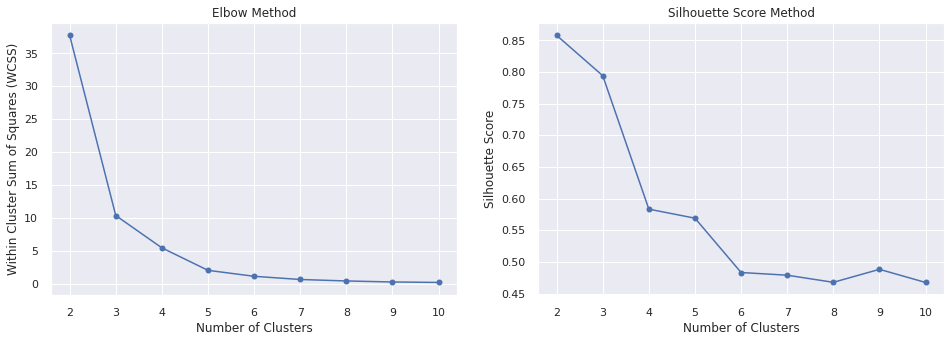

In [63]:
fig, (ax1, ax2) = plt.subplots(1, 2,figsize=(16,5))
x=np.arange(2,11)
ax1.plot(x,wcss,marker='o')
ax1.set_xlabel("Number of Clusters")
ax1.set_ylabel("Within Cluster Sum of Squares (WCSS)")
ax1.set_title("Elbow Method")
x=np.arange(2,11)
ax2.plot(x,sil,marker='o')
ax2.set_xlabel("Number of Clusters")
ax2.set_ylabel("Silhouette Score")
ax2.set_title("Silhouette Score Method")

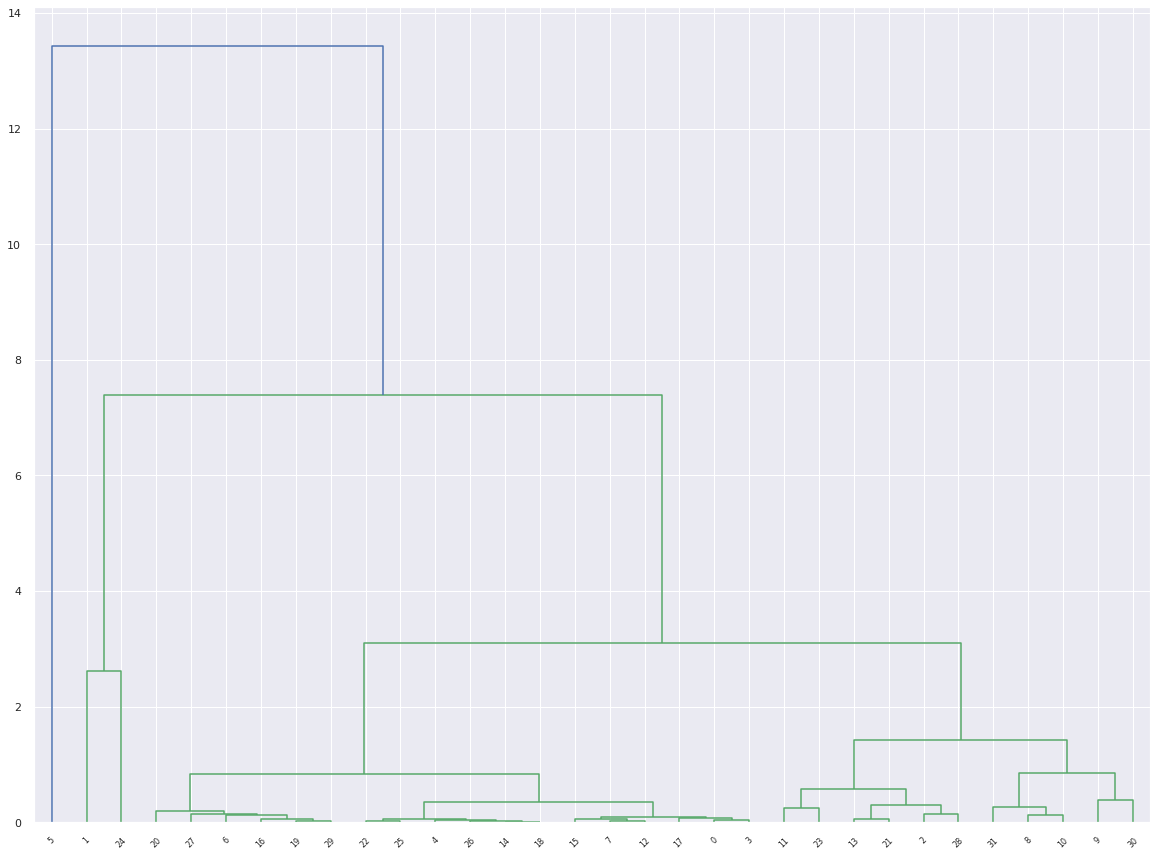

In [64]:
import scipy.cluster.hierarchy as sch
plt.figure(figsize=(20,15))
dendogram=sch.dendrogram(sch.linkage(X, method  = "ward"))

In [65]:
clf_final=KMeans(n_clusters=3,init='k-means++',random_state=6)
clf_final.fit(X)

KMeans(n_clusters=3, random_state=6)

In [66]:
df_mc_prov["Clusters"]=clf_final.predict(X)

**Summary of Clusters**

In [67]:
df_mc_prov["Clusters"].value_counts()

2    29
0     2
1     1
Name: Clusters, dtype: int64

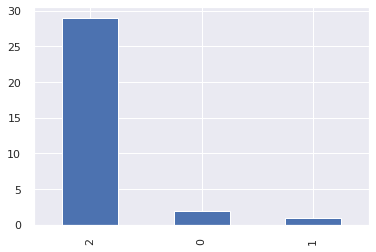

In [68]:
df_mc_prov.Clusters.value_counts().plot.bar()

In [69]:
cluster_summary=pd.concat([
                           df_mc_prov[df_mc_prov["Clusters"]==2].head(15),
                           df_mc_prov[df_mc_prov["Clusters"]==1].head(15),
                           df_mc_prov[df_mc_prov["Clusters"]==0].head(15)])
cluster_summary.style.background_gradient(cmap='Reds')

,province,totalNotTestedProvince,totalAlreadyTestedProvince,totalCovidResultNegatifProvince,totalCovidResultPositifProvince,Clusters
0,Aceh,826.000000,3947.000000,4712.000000,61.000000,2
2,Bangka Belitung,2318.000000,12751.000000,14884.000000,185.000000,2
3,Bengkulu,566.000000,3384.000000,3885.000000,65.000000,2
4,Gorontalo,34.000000,456.000000,472.000000,18.000000,2
6,Jambi,1577.000000,9943.000000,11406.000000,114.000000,2
7,Jawa Barat,631.000000,2808.000000,3387.000000,52.000000,2
8,Jawa Tengah,3238.000000,19650.000000,22479.000000,409.000000,2
9,Jawa Timur,7206.000000,32740.000000,39511.000000,435.000000,2
10,Kalimantan Barat,4040.000000,19943.000000,23543.000000,440.000000,2
11,Kalimantan Selatan,1535.000000,23828.000000,25059.000000,304.000000,2


### **totalNotTestedProvince**

In [70]:
print("Average totalNotTestedProvince of Cluster 0: ",df_mc_prov[df_mc_prov["Clusters"]==0]["totalNotTestedProvince"].mean())
print("Average totalNotTestedProvince of Cluster 1: ",df_mc_prov[df_mc_prov["Clusters"]==1]["totalNotTestedProvince"].mean())
print("Average totalNotTestedProvince of Cluster 2: ",df_mc_prov[df_mc_prov["Clusters"]==2]["totalNotTestedProvince"].mean())

Average totalNotTestedProvince of Cluster 0:  21204.5
Average totalNotTestedProvince of Cluster 1:  41039.0
Average totalNotTestedProvince of Cluster 2:  1706.8275862068965


### **totalAlreadyTestedProvince**

In [71]:
print("Average totalAlreadyTestedProvince of Cluster 0: ",df_mc_prov[df_mc_prov["Clusters"]==0]["totalAlreadyTestedProvince"].mean())
print("Average totalAlreadyTestedProvince of Cluster 1: ",df_mc_prov[df_mc_prov["Clusters"]==1]["totalAlreadyTestedProvince"].mean())
print("Average totalAlreadyTestedProvince of Cluster 2: ",df_mc_prov[df_mc_prov["Clusters"]==2]["totalAlreadyTestedProvince"].mean())

Average totalAlreadyTestedProvince of Cluster 0:  53107.5
Average totalAlreadyTestedProvince of Cluster 1:  228386.0
Average totalAlreadyTestedProvince of Cluster 2:  9855.724137931034


### **totalCovidResultNegatifProvince**

In [72]:
print("Average totalCovidResultNegatifProvince of Cluster 0: ",df_mc_prov[df_mc_prov["Clusters"]==0]["totalCovidResultNegatifProvince"].mean())
print("Average totalCovidResultNegatifProvince of Cluster 1: ",df_mc_prov[df_mc_prov["Clusters"]==1]["totalCovidResultNegatifProvince"].mean())
print("Average totalCovidResultNegatifProvince of Cluster 2: ",df_mc_prov[df_mc_prov["Clusters"]==2]["totalCovidResultNegatifProvince"].mean())

Average totalCovidResultNegatifProvince of Cluster 0:  72878.5
Average totalCovidResultNegatifProvince of Cluster 1:  267215.0
Average totalCovidResultNegatifProvince of Cluster 2:  11393.310344827587


### **totalCovidResultPositifProvince**

In [73]:
print("Average totalCovidResultPositifProvince of Cluster 0: ",df_mc_prov[df_mc_prov["Clusters"]==0]["totalCovidResultPositifProvince"].mean())
print("Average totalCovidResultPositifProvince of Cluster 1: ",df_mc_prov[df_mc_prov["Clusters"]==1]["totalCovidResultPositifProvince"].mean())
print("Average totalCovidResultPositifProvince of Cluster 2: ",df_mc_prov[df_mc_prov["Clusters"]==2]["totalCovidResultPositifProvince"].mean())

Average totalCovidResultPositifProvince of Cluster 0:  1433.5
Average totalCovidResultPositifProvince of Cluster 1:  2210.0
Average totalCovidResultPositifProvince of Cluster 2:  169.24137931034483


### **positifRate**

In [74]:
# print("Average positifRate of Cluster 0: ",df_mc_prov[df_mc_prov["Clusters"]==0]["positifRate"].mean())
# print("Average positifRate of Cluster 1: ",df_mc_prov[df_mc_prov["Clusters"]==1]["positifRate"].mean())
# print("Average positifRate of Cluster 2: ",df_mc_prov[df_mc_prov["Clusters"]==2]["positifRate"].mean())

In [75]:
import seaborn as sns

Seaborn merupakan pustaka visualisasi data pada lingkungan Python ber- sifat sumber terbuka yang berlisensi BSD dan dibangun di atas pustaka matplotlib. Seaborn akan mempermudah kita sebagai analis data untuk memproduksi visualisasi yang indah tanpa kostumisasi rumit seperti yang kita hadapi pada matplotlib.

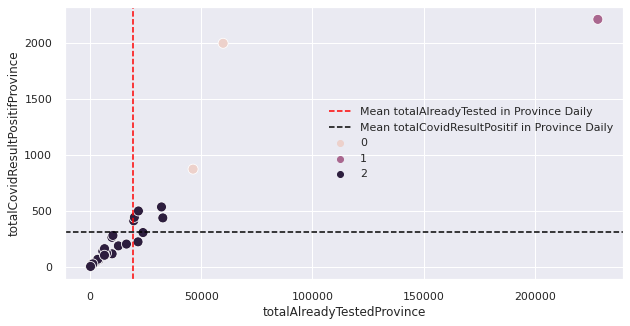

In [76]:
plt.figure(figsize=(10,5))
sns.scatterplot(x=df_mc_prov["totalAlreadyTestedProvince"],y=df_mc_prov["totalCovidResultPositifProvince"],hue=df_mc_prov["Clusters"],s=100)
plt.axvline((df_mc_prov["totalAlreadyTestedProvince"]).mean(),color='red',linestyle="--",label="Mean totalAlreadyTested in Province Daily")
plt.axhline((df_mc_prov["totalCovidResultPositifProvince"]).mean(),color='black',linestyle="--",label="Mean totalCovidResultPositif in Province Daily")
plt.legend()

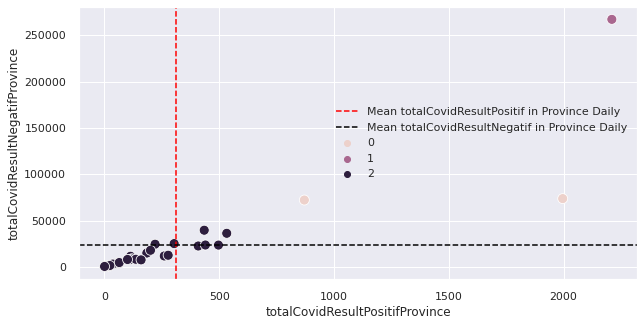

In [77]:
plt.figure(figsize=(10,5))
sns.scatterplot(x=df_mc_prov["totalCovidResultPositifProvince"],y=df_mc_prov["totalCovidResultNegatifProvince"],hue=df_mc_prov["Clusters"],s=100)
plt.axvline((df_mc_prov["totalCovidResultPositifProvince"]).mean(),color='red',linestyle="--",label="Mean totalCovidResultPositif in Province Daily")
plt.axhline((df_mc_prov["totalCovidResultNegatifProvince"]).mean(),color='black',linestyle="--",label="Mean totalCovidResultNegatif in Province Daily")
plt.legend()

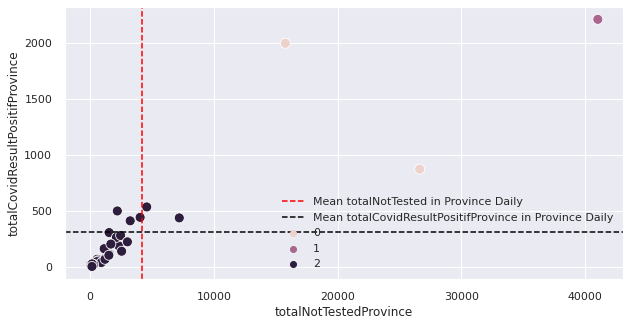

In [78]:
plt.figure(figsize=(10,5))
sns.scatterplot(x=df_mc_prov["totalNotTestedProvince"],y=df_mc_prov["totalCovidResultPositifProvince"],hue=df_mc_prov["Clusters"],s=100)
plt.axvline((df_mc_prov["totalNotTestedProvince"]).mean(),color='red',linestyle="--",label="Mean totalNotTested in Province Daily")
plt.axhline((df_mc_prov["totalCovidResultPositifProvince"]).mean(),color='black',linestyle="--",label="Mean totalCovidResultPositifProvince in Province Daily")
plt.legend()

In [79]:
# plt.figure(figsize=(10,5))
# sns.scatterplot(x=df_mc_prov["totalNotTestedProvince"],y=df_mc_prov["positifRate"],hue=df_mc_prov["Clusters"],s=100)
# plt.axvline((df_mc_prov["totalNotTestedProvince"]).mean(),color='red',linestyle="--",label="Mean totalNotTested in Province Daily")
# plt.axhline((df_mc_prov["positifRate"]).mean(),color='black',linestyle="--",label="Mean positifRate in Province Daily")
# plt.legend()

In [80]:
print("Few Province belonging to Cluster 0: ",str(set(df_mc_prov[df_mc_prov["Clusters"]==0].province)))
print("Few Province belonging to Cluster 1: ",str(set(df_mc_prov[df_mc_prov["Clusters"]==1].province)))
print("Few Province belonging to Cluster 2: ",str(set(df_mc_prov[df_mc_prov["Clusters"]==2].province)))

Few Province belonging to Cluster 0:  {'Sulawesi Selatan', 'Bali'}
Few Province belonging to Cluster 1:  {'Jakarta'}
Few Province belonging to Cluster 2:  {'Maluku', 'Kalimantan Timur', 'Nusa Tenggara Barat', 'Gorontalo', 'Sulawesi Utara', 'Jawa Tengah', 'Bangka Belitung', 'Sulawesi Tenggara', 'Lampung', 'Aceh', 'Kalimantan Utara', 'Sulawesi Tengah', 'Papua', 'Kalimantan Barat', 'Riau', 'Papua Barat', 'Nusa Tenggara Timur', 'Kepulauan Riau', 'Jawa Timur', 'Bengkulu', 'Yogyakarta', 'Kalimantan Selatan', 'Sumatera Selatan', 'Sumatera Utara', 'Jawa Barat', 'Sumatera Barat', 'Jambi', 'Maluku Utara', 'Kalimantan Tengah'}


### **PCA**

In [81]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
result = df_mc_prov.copy()
columns = ['totalNotTestedProvince', 'totalAlreadyTestedProvince', 'totalCovidResultNegatifProvince', 'totalCovidResultPositifProvince']
for i in columns:
  result[i] = sc.fit_transform(result[[i]])

In [82]:
from sklearn.decomposition import PCA
# reduce dimension
pca = PCA(n_components=2)
pca_feat = pca.fit_transform(result[columns])
pca_feat

array([[-0.83500724, -0.10933686],
       [ 2.746015  ,  0.14424756],
       [-0.40570515, -0.07330914],
       [-0.86267398, -0.08893812],
       [-1.01345883, -0.11014564],
       [ 9.29779425, -0.93938333],
       [-0.59126188, -0.13411818],
       [-0.88397481, -0.10203045],
       [ 0.03404521,  0.17367475],
       [ 0.6445452 , -0.0675786 ],
       [ 0.12689034,  0.20909042],
       [-0.08805498, -0.05063642],
       [-0.89591764, -0.11524105],
       [-0.41489385,  0.10846213],
       [-1.01813626, -0.13536093],
       [-0.89710254, -0.12076259],
       [-0.65993179, -0.0771    ],
       [-0.8162066 , -0.09988987],
       [-1.01601929, -0.12563404],
       [-0.68064855, -0.07603264],
       [-0.59936461, -0.03749176],
       [-0.36422901,  0.12436621],
       [-0.98950351, -0.11616121],
       [-0.11565747, -0.17499746],
       [ 3.37030893,  1.98206768],
       [-0.98016699, -0.11574959],
       [-1.0265544 , -0.13706289],
       [-0.6586696 ,  0.00945854],
       [-0.35076676,

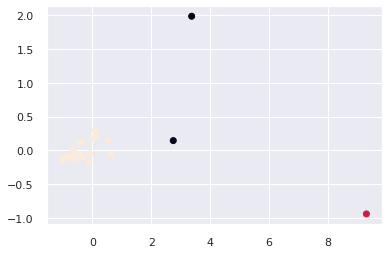

<Figure size 1440x1440 with 0 Axes>

In [83]:
plt.scatter(x=pca_feat[:,0], y=pca_feat[:,1], c=result['Clusters'], alpha=1)
plt.figure(figsize=(20,20))
plt.show()

In [84]:
avg_cluster = result.groupby(by='Clusters').mean()
avg_cluster.reset_index(inplace=True)
avg_cluster

,Clusters,totalNotTestedProvince,totalAlreadyTestedProvince,totalCovidResultNegatifProvince,totalCovidResultPositifProvince
0,0,2.035352,0.842410,1.047829,2.233518
1,1,4.403113,5.221376,5.149339,3.779996
2,2,-0.292201,-0.238145,-0.249828,-0.284380


### **Radar chart**

In [85]:
from math import pi

def plot_radar_df(df, feat_cols, label_col, selected_label_list, split_chart=False, dpi=100, n_cols = 3, fig_h=8, fig_w=8):
    
    # min-max normalization
    for col in feat_cols:
        df[col] = (df[col] - df[col].min()) / (df[col].max() - df[col].min())
    
    # select data:
    row_idx = df[label_col].isin(selected_label_list)
    data = df[row_idx]
    data = data[feat_cols].values

    # number of variable
    N = len(feat_cols)

    # angle of each axis in the plot
    angles = [n / float(N) * 2 * pi for n in range(N)]
    angles += angles[:1]

    # set color
    my_color = plt.cm.get_cmap("Set2", len(df.index))

    # set font size and subplot
    if not split_chart:
        ax = plt.subplot(111, polar=True )
        size = 10
    else:
        size = 5
        dpi = 1.5*dpi

    for i in range(len(data)):

        title = label_col +'_' +str(selected_label_list[i])

        # Initialise the spider plot
        if split_chart:
            n_rows = np.ceil(len(df)/n_cols)
            ax = plt.subplot(n_rows,n_cols,i+1, polar=True )

        # If you want the first axis to be on top:
        ax.set_theta_offset(pi / 2)
        ax.set_theta_direction(-1)

        # Draw one axe per variable + add labels labels yet
        plt.xticks(angles[:-1], feat_cols, color='grey', size=int(size*0.8))

        # Draw ylabels
        ax.set_rlabel_position(0)
        plt.yticks([0.20, 0.4, 0.6, 0.8,  1], \
                   ["20%","40%","60%","80%","100%"], color="grey", size=size)
        plt.ylim(0,1)

        # Plot
        values = list(data[i,:])
        values += values[:1]
        ax.plot(angles, values, color=my_color(i), linewidth=2, linestyle='solid', label=title)
        ax.fill(angles, values, color=my_color(i), alpha=0.4)

        # Add a title or legend
        if split_chart:
            plt.title(title, size=11, color=my_color(i), y=1.2)
        else:
            plt.legend(loc='best', bbox_to_anchor=(0.1, 0.1))

        # Adjust DPI
        fig = plt.gcf()
        fig.set_dpi(dpi)
        fig.set_figheight(fig_h)
        fig.set_figwidth(fig_w)

    plt.tight_layout()
    plt.show()

In [86]:
avg_cluster.columns

Index(['Clusters', 'totalNotTestedProvince', 'totalAlreadyTestedProvince',
       'totalCovidResultNegatifProvince', 'totalCovidResultPositifProvince'],
      dtype='object')

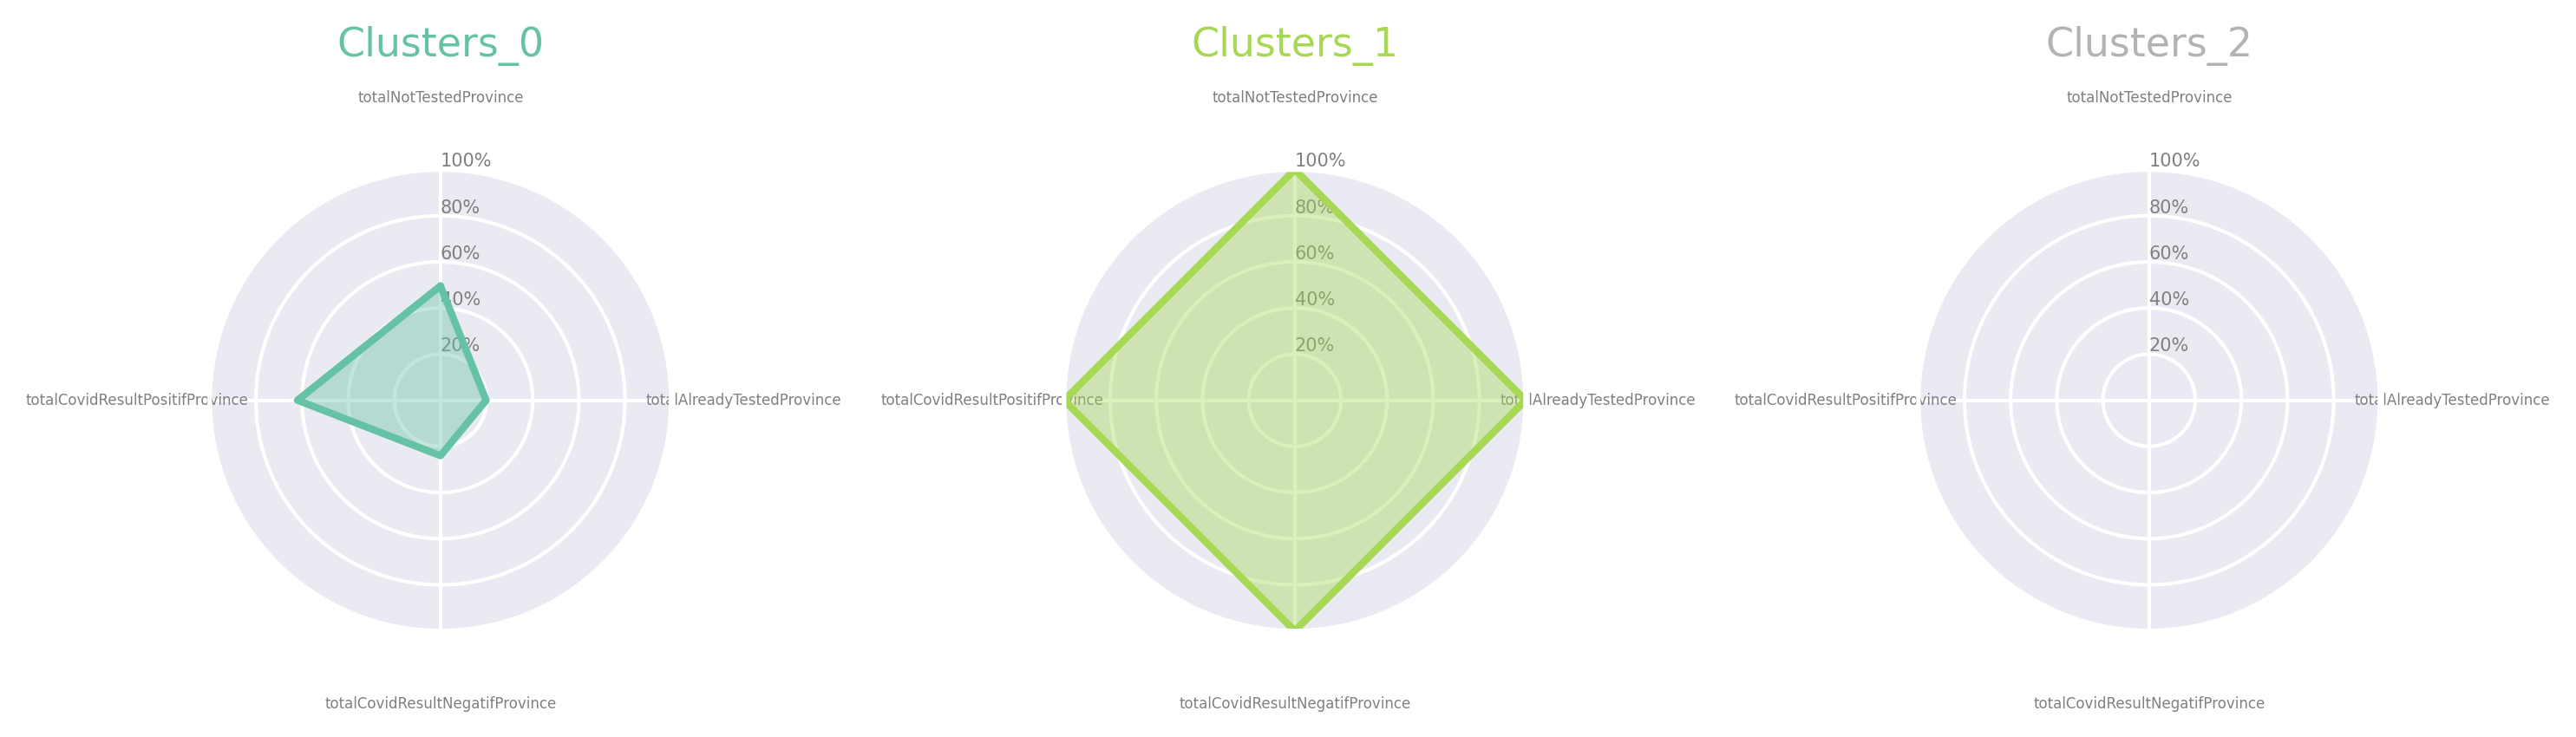

In [87]:
feat_cols = [
       'totalNotTestedProvince', 'totalAlreadyTestedProvince',
       'totalCovidResultNegatifProvince', 'totalCovidResultPositifProvince'
       ]

label_col = 'Clusters'
selected_label_list = [i for i in range(8)]

plot_radar_df(avg_cluster, feat_cols, label_col, selected_label_list, split_chart=True, dpi=200, n_cols=3, fig_h=10, fig_w=10)

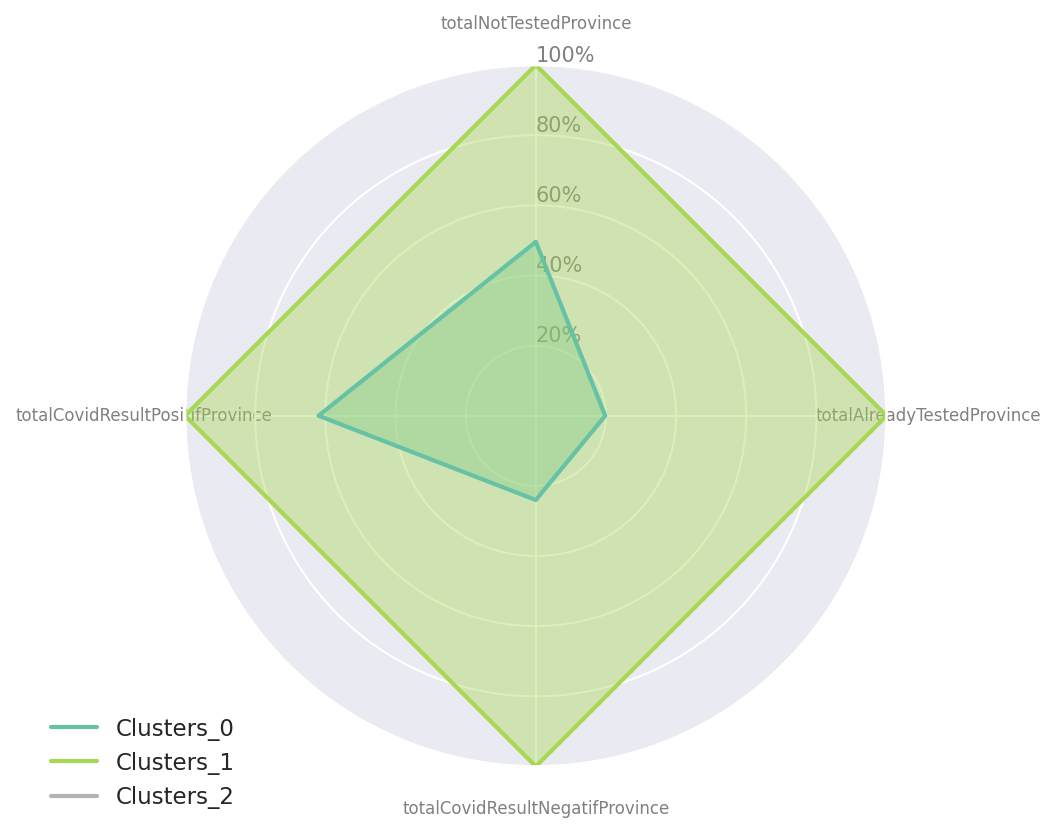

In [88]:
label_col = 'Clusters'
selected_label_list = [i for i in range(8)]

plot_radar_df(avg_cluster, feat_cols, label_col, selected_label_list, split_chart=False, dpi=150, n_cols=3, fig_h=7, fig_w=7)

* `Cluster 0` is ------------- 

    Rekomendation : 

* `Cluster 1` is ------------- 

    Rekomendation : 

* `Cluster 2` is ------------- 

    Rekomendation : 

* `Cluster 3` is ------------- 

    Rekomendation : 



* `Cluster 0` is ------------- 

    Rekomendation : 

* `Cluster 1` is ------------- 

    Rekomendation : 

* `Cluster 2` is ------------- 

    Rekomendation : 

* `Cluster 3` is ------------- 

    Rekomendation : 



# **Modelling data Peduli Lindungi**

`scanPeduliLindungiMobFix02.csv`

In [89]:
df_pl = pd.read_csv("scanPeduliLindungiMobFix02.csv")
df_pl

,createdAt,Provinsi,Column1,totalAlreadyVaccinatedProvince,totalNotVaccinatedProvince,vaksin_rate,total_crowd_prov,avg_crowd_prov,safety_rate,retail_and_recreation_percent_change_from_baseline,grocery_and_pharmacy_percent_change_from_baseline,parks_percent_change_from_baseline,transit_stations_percent_change_from_baseline,workplaces_percent_change_from_baseline,residential_percent_change_from_baseline
0,2021-07-03,BANTEN,282176,0.0,1.0,0.000000,1.0,1.000000,0.000000,-18.0,13.0,-17.0,-53.0,-20.0,15.0
1,2021-07-04,BANTEN,140402,0.0,5.0,0.000000,7.0,1.400000,0.000000,-21.0,9.0,-22.0,-55.0,-16.0,15.0
2,2021-07-04,BANTEN,701491,0.0,5.0,0.000000,7.0,1.400000,0.000000,-21.0,9.0,-22.0,-55.0,-16.0,15.0
3,2021-07-04,BANTEN,561964,0.0,5.0,0.000000,7.0,1.400000,0.000000,-21.0,9.0,-22.0,-55.0,-16.0,15.0
4,2021-07-04,BANTEN,562320,0.0,5.0,0.000000,7.0,1.400000,0.000000,-21.0,9.0,-22.0,-55.0,-16.0,15.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3609309,2021-08-23,BANTEN,144735,10021.0,85791.0,0.104590,663505610.0,6925.078383,1.447059,-3.0,7.0,1.0,-52.0,-22.0,12.0
3609310,2021-08-23,BANTEN,144594,10021.0,85791.0,0.104590,663505610.0,6925.078383,1.447059,-3.0,7.0,1.0,-52.0,-22.0,12.0
3609311,2021-08-23,BANTEN,144572,10021.0,85791.0,0.104590,663505610.0,6925.078383,1.447059,-3.0,7.0,1.0,-52.0,-22.0,12.0
3609312,2021-08-23,BANTEN,144232,10021.0,85791.0,0.104590,663505610.0,6925.078383,1.447059,-3.0,7.0,1.0,-52.0,-22.0,12.0


In [90]:
ambigu_column = ["Column1", "vaksin_rate"]
df_pl = df_pl.drop(ambigu_column,axis = 1)
df_pl.head()

,createdAt,Provinsi,totalAlreadyVaccinatedProvince,totalNotVaccinatedProvince,total_crowd_prov,avg_crowd_prov,safety_rate,retail_and_recreation_percent_change_from_baseline,grocery_and_pharmacy_percent_change_from_baseline,parks_percent_change_from_baseline,transit_stations_percent_change_from_baseline,workplaces_percent_change_from_baseline,residential_percent_change_from_baseline
0,2021-07-03,BANTEN,0.0,1.0,1.0,1.0,0.0,-18.0,13.0,-17.0,-53.0,-20.0,15.0
1,2021-07-04,BANTEN,0.0,5.0,7.0,1.4,0.0,-21.0,9.0,-22.0,-55.0,-16.0,15.0
2,2021-07-04,BANTEN,0.0,5.0,7.0,1.4,0.0,-21.0,9.0,-22.0,-55.0,-16.0,15.0
3,2021-07-04,BANTEN,0.0,5.0,7.0,1.4,0.0,-21.0,9.0,-22.0,-55.0,-16.0,15.0
4,2021-07-04,BANTEN,0.0,5.0,7.0,1.4,0.0,-21.0,9.0,-22.0,-55.0,-16.0,15.0


In [91]:
df_pl.columns

Index(['createdAt', 'Provinsi', 'totalAlreadyVaccinatedProvince',
       'totalNotVaccinatedProvince', 'total_crowd_prov', 'avg_crowd_prov',
       'safety_rate', 'retail_and_recreation_percent_change_from_baseline',
       'grocery_and_pharmacy_percent_change_from_baseline',
       'parks_percent_change_from_baseline',
       'transit_stations_percent_change_from_baseline',
       'workplaces_percent_change_from_baseline',
       'residential_percent_change_from_baseline'],
      dtype='object')

In [92]:
df_pl.rename(columns={'Provinsi': 'province'}, inplace=True)

In [93]:
df_pl["createdAt"] = pd.to_datetime(df_pl["createdAt"])

In [94]:
df_pl.columns

Index(['createdAt', 'province', 'totalAlreadyVaccinatedProvince',
       'totalNotVaccinatedProvince', 'total_crowd_prov', 'avg_crowd_prov',
       'safety_rate', 'retail_and_recreation_percent_change_from_baseline',
       'grocery_and_pharmacy_percent_change_from_baseline',
       'parks_percent_change_from_baseline',
       'transit_stations_percent_change_from_baseline',
       'workplaces_percent_change_from_baseline',
       'residential_percent_change_from_baseline'],
      dtype='object')

In [95]:
np.sort(df_pl['createdAt'].unique())

array(['2021-07-03T00:00:00.000000000', '2021-07-04T00:00:00.000000000',
       '2021-07-05T00:00:00.000000000', '2021-07-06T00:00:00.000000000',
       '2021-07-07T00:00:00.000000000', '2021-07-08T00:00:00.000000000',
       '2021-07-09T00:00:00.000000000', '2021-07-10T00:00:00.000000000',
       '2021-07-11T00:00:00.000000000', '2021-07-12T00:00:00.000000000',
       '2021-07-13T00:00:00.000000000', '2021-07-14T00:00:00.000000000',
       '2021-07-16T00:00:00.000000000', '2021-07-17T00:00:00.000000000',
       '2021-07-18T00:00:00.000000000', '2021-07-19T00:00:00.000000000',
       '2021-07-20T00:00:00.000000000', '2021-07-21T00:00:00.000000000',
       '2021-07-22T00:00:00.000000000', '2021-07-23T00:00:00.000000000',
       '2021-07-24T00:00:00.000000000', '2021-07-25T00:00:00.000000000',
       '2021-07-26T00:00:00.000000000', '2021-07-27T00:00:00.000000000',
       '2021-07-28T00:00:00.000000000', '2021-07-29T00:00:00.000000000',
       '2021-07-30T00:00:00.000000000', '2021-08-01

In [96]:
for province in np.unique(df_pl['province']):
  df_pl.loc[df_pl['province'] == province, ['province']] = province.capitalize()

In [97]:
df_pl.isna().sum()

createdAt                                             0
province                                              0
totalAlreadyVaccinatedProvince                        0
totalNotVaccinatedProvince                            0
total_crowd_prov                                      0
avg_crowd_prov                                        0
safety_rate                                           0
retail_and_recreation_percent_change_from_baseline    0
grocery_and_pharmacy_percent_change_from_baseline     0
parks_percent_change_from_baseline                    0
transit_stations_percent_change_from_baseline         0
workplaces_percent_change_from_baseline               0
residential_percent_change_from_baseline              0
dtype: int64

In [98]:
df_pl.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3609314 entries, 0 to 3609313
Data columns (total 13 columns):
 #   Column                                              Dtype         
---  ------                                              -----         
 0   createdAt                                           datetime64[ns]
 1   province                                            object        
 2   totalAlreadyVaccinatedProvince                      float64       
 3   totalNotVaccinatedProvince                          float64       
 4   total_crowd_prov                                    float64       
 5   avg_crowd_prov                                      float64       
 6   safety_rate                                         float64       
 7   retail_and_recreation_percent_change_from_baseline  float64       
 8   grocery_and_pharmacy_percent_change_from_baseline   float64       
 9   parks_percent_change_from_baseline                  float64       
 10  transit_stations_p

In [99]:
np.sort(df_pl["province"].unique())

array(['Aceh', 'Bali', 'Bangka belitung', 'Banten', 'Gorontalo',
       'Jakarta', 'Jambi', 'Jawa barat', 'Jawa tengah', 'Jawa timur',
       'Kalimantan barat', 'Kalimantan selatan', 'Kalimantan tengah',
       'Maluku', 'Nusa tenggara barat', 'Nusa tenggara timur', 'Papua',
       'Riau', 'Sulawesi selatan', 'Sulawesi tengah', 'Sulawesi tenggara',
       'Sulawesi utara', 'Sumatera barat', 'Sumatera selatan',
       'Sumatera utara', 'Yogyakarta'], dtype=object)

In [100]:
np.sort(df_pl["createdAt"].unique())

array(['2021-07-03T00:00:00.000000000', '2021-07-04T00:00:00.000000000',
       '2021-07-05T00:00:00.000000000', '2021-07-06T00:00:00.000000000',
       '2021-07-07T00:00:00.000000000', '2021-07-08T00:00:00.000000000',
       '2021-07-09T00:00:00.000000000', '2021-07-10T00:00:00.000000000',
       '2021-07-11T00:00:00.000000000', '2021-07-12T00:00:00.000000000',
       '2021-07-13T00:00:00.000000000', '2021-07-14T00:00:00.000000000',
       '2021-07-16T00:00:00.000000000', '2021-07-17T00:00:00.000000000',
       '2021-07-18T00:00:00.000000000', '2021-07-19T00:00:00.000000000',
       '2021-07-20T00:00:00.000000000', '2021-07-21T00:00:00.000000000',
       '2021-07-22T00:00:00.000000000', '2021-07-23T00:00:00.000000000',
       '2021-07-24T00:00:00.000000000', '2021-07-25T00:00:00.000000000',
       '2021-07-26T00:00:00.000000000', '2021-07-27T00:00:00.000000000',
       '2021-07-28T00:00:00.000000000', '2021-07-29T00:00:00.000000000',
       '2021-07-30T00:00:00.000000000', '2021-08-01

In [101]:
df_pl.shape

(3609314, 13)

## **Clustering K-Means**

**Importing Library**

In [102]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score,silhouette_samples
std=StandardScaler()

Standard Scaling since K-Means Clustering is a distance based alogrithm. 

In general, attribute scaling is important to be applied with K-means. Most of the time, the standard Euclidean distance is used (as a distance function of K-means) with the assumption that the attributes are normalized. 

In [103]:
X=df_pl[['totalAlreadyVaccinatedProvince',
       'totalNotVaccinatedProvince', 'total_crowd_prov',
       'avg_crowd_prov', 'safety_rate',
       'retail_and_recreation_percent_change_from_baseline',
       'grocery_and_pharmacy_percent_change_from_baseline',
       'parks_percent_change_from_baseline',
       'transit_stations_percent_change_from_baseline',
       'workplaces_percent_change_from_baseline',
       'residential_percent_change_from_baseline']]
#Standard Scaling since K-Means Clustering is a distance based alogrithm
X=std.fit_transform(X)

**Calculating k numbers using Elbow and Silhouette**

In [104]:
# wcss=[]
# sil=[]
# for i in range(2,11):
#     clf=KMeans(n_clusters=i,init='k-means++',random_state=42)
#     clf.fit(X)
#     labels=clf.labels_
#     centroids=clf.cluster_centers_
#     sil.append(silhouette_score(X, labels, metric='euclidean'))
#     wcss.append(clf.inertia_)

**Importing Visualization Library**

*   Matplotlib adalah pustaka visualisasi data multiplatform yang dibangun di atas array NumPy

*   NumPy (Numerical Python) adalah library Python yang fokus pada scientific computing. 

In [105]:
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

In [106]:
# fig, (ax1, ax2) = plt.subplots(1, 2,figsize=(16,5))
# x=np.arange(2,11)
# ax1.plot(x,wcss,marker='o')
# ax1.set_xlabel("Number of Clusters")
# ax1.set_ylabel("Within Cluster Sum of Squares (WCSS)")
# ax1.set_title("Elbow Method")
# x=np.arange(2,11)
# ax2.plot(x,sil,marker='o')
# ax2.set_xlabel("Number of Clusters")
# ax2.set_ylabel("Silhouette Score")
# ax2.set_title("Silhouette Score Method")

In [107]:
# import scipy.cluster.hierarchy as sch
# plt.figure(figsize=(20,15))
# dendogram=sch.dendrogram(sch.linkage(X, method  = "ward"))

In [108]:
clf_final=KMeans(n_clusters=4,init='k-means++',random_state=6)
clf_final.fit(X)

KMeans(n_clusters=4, random_state=6)

In [109]:
df_pl["Clusters"]=clf_final.predict(X)

**Summary of Clusters**

In [110]:
df_pl["Clusters"].value_counts()

1    1344488
0    1342631
3     763270
2     158925
Name: Clusters, dtype: int64

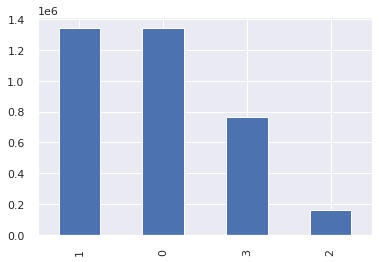

In [111]:
df_pl.Clusters.value_counts().plot.bar()

In [112]:
cluster_summary=pd.concat([
                           df_pl[df_pl["Clusters"]==3].head(15),
                           df_pl[df_pl["Clusters"]==2].head(15),
                           df_pl[df_pl["Clusters"]==1].head(15),
                           df_pl[df_pl["Clusters"]==0].head(15)])
cluster_summary.style.background_gradient(cmap='Reds')

,createdAt,province,totalAlreadyVaccinatedProvince,totalNotVaccinatedProvince,total_crowd_prov,avg_crowd_prov,safety_rate,retail_and_recreation_percent_change_from_baseline,grocery_and_pharmacy_percent_change_from_baseline,parks_percent_change_from_baseline,transit_stations_percent_change_from_baseline,workplaces_percent_change_from_baseline,residential_percent_change_from_baseline,Clusters
2166889,2021-08-21 00:00:00,Jakarta,7314.000000,390542.000000,6173477095.000000,15516.863124,0.471358,-31.000000,-1.000000,-52.000000,-43.000000,-19.000000,10.000000,3
2271050,2021-08-21 00:00:00,Jakarta,7314.000000,390542.000000,6173477095.000000,15516.863124,0.471358,-31.000000,-1.000000,-52.000000,-43.000000,-19.000000,10.000000,3
2271052,2021-08-21 00:00:00,Jakarta,7314.000000,390542.000000,6173477095.000000,15516.863124,0.471358,-31.000000,-1.000000,-52.000000,-43.000000,-19.000000,10.000000,3
2271053,2021-08-21 00:00:00,Jakarta,7314.000000,390542.000000,6173477095.000000,15516.863124,0.471358,-31.000000,-1.000000,-52.000000,-43.000000,-19.000000,10.000000,3
2271054,2021-08-21 00:00:00,Jakarta,7314.000000,390542.000000,6173477095.000000,15516.863124,0.471358,-31.000000,-1.000000,-52.000000,-43.000000,-19.000000,10.000000,3
2271055,2021-08-21 00:00:00,Jakarta,7314.000000,390542.000000,6173477095.000000,15516.863124,0.471358,-31.000000,-1.000000,-52.000000,-43.000000,-19.000000,10.000000,3
2271056,2021-08-21 00:00:00,Jakarta,7314.000000,390542.000000,6173477095.000000,15516.863124,0.471358,-31.000000,-1.000000,-52.000000,-43.000000,-19.000000,10.000000,3
2271057,2021-08-21 00:00:00,Jakarta,7314.000000,390542.000000,6173477095.000000,15516.863124,0.471358,-31.000000,-1.000000,-52.000000,-43.000000,-19.000000,10.000000,3
2271058,2021-08-21 00:00:00,Jakarta,7314.000000,390542.000000,6173477095.000000,15516.863124,0.471358,-31.000000,-1.000000,-52.000000,-43.000000,-19.000000,10.000000,3
2271059,2021-08-21 00:00:00,Jakarta,7314.000000,390542.000000,6173477095.000000,15516.863124,0.471358,-31.000000,-1.000000,-52.000000,-43.000000,-19.000000,10.000000,3


### **totalAlreadyVaccinatedProvince**

In [113]:
print("Average totalAlreadyVaccinatedProvince of Cluster 0: ",df_pl[df_pl["Clusters"]==0]["totalAlreadyVaccinatedProvince"].mean())
print("Average totalAlreadyVaccinatedProvince of Cluster 1: ",df_pl[df_pl["Clusters"]==1]["totalAlreadyVaccinatedProvince"].mean())
print("Average totalAlreadyVaccinatedProvince of Cluster 2: ",df_pl[df_pl["Clusters"]==2]["totalAlreadyVaccinatedProvince"].mean())
print("Average totalAlreadyVaccinatedProvince of Cluster 3: ",df_pl[df_pl["Clusters"]==3]["totalAlreadyVaccinatedProvince"].mean())

Average totalAlreadyVaccinatedProvince of Cluster 0:  2018.3853501073638
Average totalAlreadyVaccinatedProvince of Cluster 1:  573.3200214505447
Average totalAlreadyVaccinatedProvince of Cluster 2:  22260.86277174768
Average totalAlreadyVaccinatedProvince of Cluster 3:  12873.22198959739


### **totalNotVaccinatedProvince**

In [114]:
print("Average totalNotVaccinatedProvince of Cluster 0: ",df_pl[df_pl["Clusters"]==0]["totalNotVaccinatedProvince"].mean())
print("Average totalNotVaccinatedProvince of Cluster 1: ",df_pl[df_pl["Clusters"]==1]["totalNotVaccinatedProvince"].mean())
print("Average totalNotVaccinatedProvince of Cluster 2: ",df_pl[df_pl["Clusters"]==2]["totalNotVaccinatedProvince"].mean())
print("Average totalNotVaccinatedProvince of Cluster 3: ",df_pl[df_pl["Clusters"]==3]["totalNotVaccinatedProvince"].mean())

Average totalNotVaccinatedProvince of Cluster 0:  76961.63320376187
Average totalNotVaccinatedProvince of Cluster 1:  266888.44040779833
Average totalNotVaccinatedProvince of Cluster 2:  136476.2484253579
Average totalNotVaccinatedProvince of Cluster 3:  369451.234797647


### **vaksin_rate**

In [115]:
# print("Average vaksin_rate of Cluster 0: ",df_pl[df_pl["Clusters"]==0]["vaksin_rate"].mean())
# print("Average vaksin_rate of Cluster 1: ",df_pl[df_pl["Clusters"]==1]["vaksin_rate"].mean())
# print("Average vaksin_rate of Cluster 2: ",df_pl[df_pl["Clusters"]==2]["vaksin_rate"].mean())
# print("Average vaksin_rate of Cluster 3: ",df_pl[df_pl["Clusters"]==3]["vaksin_rate"].mean())

### **total_crowd_prov**

In [116]:
print("Average total_crowd_prov of Cluster 0: ",df_pl[df_pl["Clusters"]==0]["total_crowd_prov"].mean())
print("Average total_crowd_prov of Cluster 1: ",df_pl[df_pl["Clusters"]==1]["total_crowd_prov"].mean())
print("Average total_crowd_prov of Cluster 2: ",df_pl[df_pl["Clusters"]==2]["total_crowd_prov"].mean())
print("Average total_crowd_prov of Cluster 3: ",df_pl[df_pl["Clusters"]==3]["total_crowd_prov"].mean())

Average total_crowd_prov of Cluster 0:  463908344.2326507
Average total_crowd_prov of Cluster 1:  1912979627.6893778
Average total_crowd_prov of Cluster 2:  663389928.3014377
Average total_crowd_prov of Cluster 3:  6083015393.882469


### **avg_crowd_prov**

In [117]:
print("Average avg_crowd_prov of Cluster 0: ",df_pl[df_pl["Clusters"]==0]["avg_crowd_prov"].mean())
print("Average avg_crowd_prov of Cluster 1: ",df_pl[df_pl["Clusters"]==1]["avg_crowd_prov"].mean())
print("Average avg_crowd_prov of Cluster 2: ",df_pl[df_pl["Clusters"]==2]["avg_crowd_prov"].mean())
print("Average avg_crowd_prov of Cluster 3: ",df_pl[df_pl["Clusters"]==3]["avg_crowd_prov"].mean())

Average avg_crowd_prov of Cluster 0:  5150.826553215797
Average avg_crowd_prov of Cluster 1:  6463.127673918555
Average avg_crowd_prov of Cluster 2:  4176.707251842788
Average avg_crowd_prov of Cluster 3:  15928.831819798643


### **safety_rate**

In [118]:
print("Average safety_rate of Cluster 0: ",df_pl[df_pl["Clusters"]==0]["safety_rate"].mean())
print("Average safety_rate of Cluster 1: ",df_pl[df_pl["Clusters"]==1]["safety_rate"].mean())
print("Average safety_rate of Cluster 2: ",df_pl[df_pl["Clusters"]==2]["safety_rate"].mean())
print("Average safety_rate of Cluster 3: ",df_pl[df_pl["Clusters"]==3]["safety_rate"].mean())

Average safety_rate of Cluster 0:  0.3033920861544919
Average safety_rate of Cluster 1:  0.07638599165251347
Average safety_rate of Cluster 2:  5.331898798469946
Average safety_rate of Cluster 3:  0.7989464882639478


### **retail_and_recreation_percent_change_from_baseline**

In [119]:
print("Average retail_and_recreation_percent_change_from_baseline of Cluster 0: ",df_pl[df_pl["Clusters"]==0]["retail_and_recreation_percent_change_from_baseline"].mean())
print("Average retail_and_recreation_percent_change_from_baseline of Cluster 1: ",df_pl[df_pl["Clusters"]==1]["retail_and_recreation_percent_change_from_baseline"].mean())
print("Average retail_and_recreation_percent_change_from_baseline of Cluster 2: ",df_pl[df_pl["Clusters"]==2]["retail_and_recreation_percent_change_from_baseline"].mean())
print("Average retail_and_recreation_percent_change_from_baseline of Cluster 3: ",df_pl[df_pl["Clusters"]==3]["retail_and_recreation_percent_change_from_baseline"].mean())

Average retail_and_recreation_percent_change_from_baseline of Cluster 0:  -8.721027594327854
Average retail_and_recreation_percent_change_from_baseline of Cluster 1:  -33.927704821463635
Average retail_and_recreation_percent_change_from_baseline of Cluster 2:  -9.995268208274343
Average retail_and_recreation_percent_change_from_baseline of Cluster 3:  -29.563755944816382


### **grocery_and_pharmacy_percent_change_from_baseline**

In [120]:
print("Average grocery_and_pharmacy_percent_change_from_baseline of Cluster 0: ",df_pl[df_pl["Clusters"]==0]["grocery_and_pharmacy_percent_change_from_baseline"].mean())
print("Average grocery_and_pharmacy_percent_change_from_baseline of Cluster 1: ",df_pl[df_pl["Clusters"]==1]["grocery_and_pharmacy_percent_change_from_baseline"].mean())
print("Average grocery_and_pharmacy_percent_change_from_baseline of Cluster 2: ",df_pl[df_pl["Clusters"]==2]["grocery_and_pharmacy_percent_change_from_baseline"].mean())
print("Average grocery_and_pharmacy_percent_change_from_baseline of Cluster 3: ",df_pl[df_pl["Clusters"]==3]["grocery_and_pharmacy_percent_change_from_baseline"].mean())

Average grocery_and_pharmacy_percent_change_from_baseline of Cluster 0:  15.447909366013446
Average grocery_and_pharmacy_percent_change_from_baseline of Cluster 1:  -6.925577617650734
Average grocery_and_pharmacy_percent_change_from_baseline of Cluster 2:  17.002957369828536
Average grocery_and_pharmacy_percent_change_from_baseline of Cluster 3:  -2.436244055183618


### **parks_percent_change_from_baseline**

In [121]:
print("Average parks_percent_change_from_baseline of Cluster 0: ",df_pl[df_pl["Clusters"]==0]["parks_percent_change_from_baseline"].mean())
print("Average parks_percent_change_from_baseline of Cluster 1: ",df_pl[df_pl["Clusters"]==1]["parks_percent_change_from_baseline"].mean())
print("Average parks_percent_change_from_baseline of Cluster 2: ",df_pl[df_pl["Clusters"]==2]["parks_percent_change_from_baseline"].mean())
print("Average parks_percent_change_from_baseline of Cluster 3: ",df_pl[df_pl["Clusters"]==3]["parks_percent_change_from_baseline"].mean())

Average parks_percent_change_from_baseline of Cluster 0:  -4.991536766244783
Average parks_percent_change_from_baseline of Cluster 1:  -51.142067463599524
Average parks_percent_change_from_baseline of Cluster 2:  2.986396098788737
Average parks_percent_change_from_baseline of Cluster 3:  -49.606259908027305


### **transit_stations_percent_change_from_baseline**

In [122]:
print("Average transit_stations_percent_change_from_baseline of Cluster 0: ",df_pl[df_pl["Clusters"]==0]["transit_stations_percent_change_from_baseline"].mean())
print("Average transit_stations_percent_change_from_baseline of Cluster 1: ",df_pl[df_pl["Clusters"]==1]["transit_stations_percent_change_from_baseline"].mean())
print("Average transit_stations_percent_change_from_baseline of Cluster 2: ",df_pl[df_pl["Clusters"]==2]["transit_stations_percent_change_from_baseline"].mean())
print("Average transit_stations_percent_change_from_baseline of Cluster 3: ",df_pl[df_pl["Clusters"]==3]["transit_stations_percent_change_from_baseline"].mean())

Average transit_stations_percent_change_from_baseline of Cluster 0:  -38.8290356769656
Average transit_stations_percent_change_from_baseline of Cluster 1:  -52.78736440935137
Average transit_stations_percent_change_from_baseline of Cluster 2:  -30.006506213622778
Average transit_stations_percent_change_from_baseline of Cluster 3:  -44.914992073578155


### **workplaces_percent_change_from_baseline**

In [123]:
print("Average workplaces_percent_change_from_baseline of Cluster 0: ",df_pl[df_pl["Clusters"]==0]["workplaces_percent_change_from_baseline"].mean())
print("Average workplaces_percent_change_from_baseline of Cluster 1: ",df_pl[df_pl["Clusters"]==1]["workplaces_percent_change_from_baseline"].mean())
print("Average workplaces_percent_change_from_baseline of Cluster 2: ",df_pl[df_pl["Clusters"]==2]["workplaces_percent_change_from_baseline"].mean())
print("Average workplaces_percent_change_from_baseline of Cluster 3: ",df_pl[df_pl["Clusters"]==3]["workplaces_percent_change_from_baseline"].mean())

Average workplaces_percent_change_from_baseline of Cluster 0:  -23.520416257333547
Average workplaces_percent_change_from_baseline of Cluster 1:  -44.35885556434866
Average workplaces_percent_change_from_baseline of Cluster 2:  -20.99585968224005
Average workplaces_percent_change_from_baseline of Cluster 3:  -26.659968294312627


### **residential_percent_change_from_baseline**

In [124]:
print("Average residential_percent_change_from_baseline of Cluster 0: ",df_pl[df_pl["Clusters"]==0]["residential_percent_change_from_baseline"].mean())
print("Average residential_percent_change_from_baseline of Cluster 1: ",df_pl[df_pl["Clusters"]==1]["residential_percent_change_from_baseline"].mean())
print("Average residential_percent_change_from_baseline of Cluster 2: ",df_pl[df_pl["Clusters"]==2]["residential_percent_change_from_baseline"].mean())
print("Average residential_percent_change_from_baseline of Cluster 3: ",df_pl[df_pl["Clusters"]==3]["residential_percent_change_from_baseline"].mean())

Average residential_percent_change_from_baseline of Cluster 0:  11.195557081580866
Average residential_percent_change_from_baseline of Cluster 1:  16.322767477285034
Average residential_percent_change_from_baseline of Cluster 2:  10.993493786377222
Average residential_percent_change_from_baseline of Cluster 3:  11.914992073578157


In [125]:
import seaborn as sns

Seaborn merupakan pustaka visualisasi data pada lingkungan Python ber- sifat sumber terbuka yang berlisensi BSD dan dibangun di atas pustaka matplotlib. Seaborn akan mempermudah kita sebagai analis data untuk memproduksi visualisasi yang indah tanpa kostumisasi rumit seperti yang kita hadapi pada matplotlib.

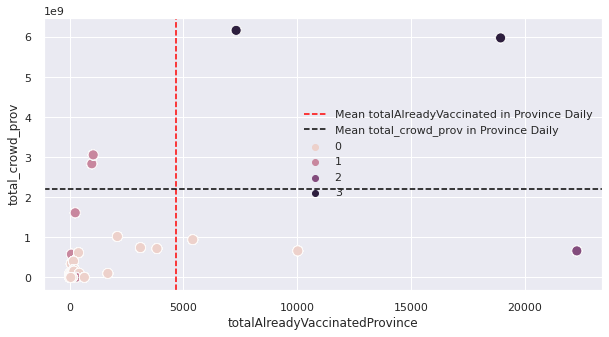

In [126]:
plt.figure(figsize=(10,5))
sns.scatterplot(x=df_pl["totalAlreadyVaccinatedProvince"],y=df_pl["total_crowd_prov"],hue=df_pl["Clusters"],s=100)
plt.axvline((df_pl["totalAlreadyVaccinatedProvince"]).mean(),color='red',linestyle="--",label="Mean totalAlreadyVaccinated in Province Daily")
plt.axhline((df_pl["total_crowd_prov"]).mean(),color='black',linestyle="--",label="Mean total_crowd_prov in Province Daily")
plt.legend()

In [127]:
# plt.figure(figsize=(10,5))
# sns.scatterplot(x=df_pl["vaksin_rate"],y=df_pl["safety_rate"],hue=df_pl["Clusters"],s=100)
# plt.axvline((df_pl["vaksin_rate"]).mean(),color='red',linestyle="--",label="Mean vaksin_rate in Province Daily")
# plt.axhline((df_pl["safety_rate"]).mean(),color='black',linestyle="--",label="Mean safety_rate in Province Daily")
# plt.legend()

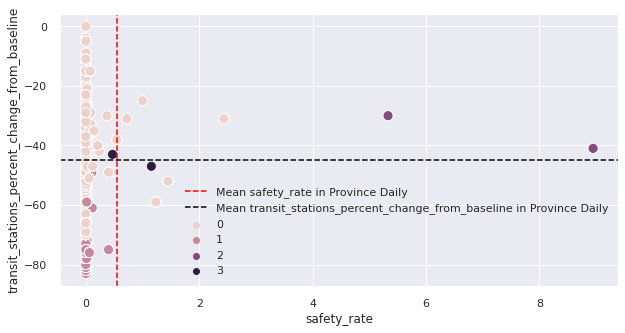

In [128]:
plt.figure(figsize=(10,5))
sns.scatterplot(x=df_pl["safety_rate"],y=df_pl["transit_stations_percent_change_from_baseline"],hue=df_pl["Clusters"],s=100)
plt.axvline((df_pl["safety_rate"]).mean(),color='red',linestyle="--",label="Mean safety_rate in Province Daily")
plt.axhline((df_pl["transit_stations_percent_change_from_baseline"]).mean(),color='black',linestyle="--",label="Mean transit_stations_percent_change_from_baseline in Province Daily")
plt.legend()

In [129]:
print("Few Province belonging to Cluster 0: ",str(set(df_pl[df_pl["Clusters"]==0].province)))
print("Few Province belonging to Cluster 1: ",str(set(df_pl[df_pl["Clusters"]==1].province)))
print("Few Province belonging to Cluster 2: ",str(set(df_pl[df_pl["Clusters"]==2].province)))
print("Few Province belonging to Cluster 3: ",str(set(df_pl[df_pl["Clusters"]==3].province)))

Few Province belonging to Cluster 0:  {'Maluku', 'Jawa barat', 'Gorontalo', 'Sumatera utara', 'Nusa tenggara timur', 'Aceh', 'Kalimantan barat', 'Bangka belitung', 'Papua', 'Sulawesi tenggara', 'Riau', 'Kalimantan tengah', 'Sulawesi selatan', 'Kalimantan selatan', 'Yogyakarta', 'Sulawesi utara', 'Nusa tenggara barat', 'Jawa timur', 'Sumatera barat', 'Banten', 'Jawa tengah', 'Jambi', 'Sulawesi tengah', 'Sumatera selatan'}
Few Province belonging to Cluster 1:  {'Bali', 'Jawa barat', 'Banten', 'Yogyakarta', 'Jakarta'}
Few Province belonging to Cluster 2:  {'Jawa barat', 'Nusa tenggara barat'}
Few Province belonging to Cluster 3:  {'Jakarta'}


### **PCA**

In [130]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
result = df_pl.copy()
columns = ['totalAlreadyVaccinatedProvince',
       'totalNotVaccinatedProvince', 'total_crowd_prov',
       'avg_crowd_prov', 'safety_rate',
       'retail_and_recreation_percent_change_from_baseline',
       'grocery_and_pharmacy_percent_change_from_baseline',
       'parks_percent_change_from_baseline',
       'transit_stations_percent_change_from_baseline',
       'workplaces_percent_change_from_baseline',
       'residential_percent_change_from_baseline']
for i in columns:
  result[i] = sc.fit_transform(result[[i]])

In [131]:
from sklearn.decomposition import PCA
# reduce dimension
pca = PCA(n_components=2)
pca_feat = pca.fit_transform(result[columns])
pca_feat

array([[ 1.89217627,  1.86300837],
       [ 1.53472501,  1.9001544 ],
       [ 1.53472501,  1.9001544 ],
       ...,
       [ 1.88160726, -0.3256329 ],
       [ 1.88160726, -0.3256329 ],
       [ 3.06631785, -3.01721952]])

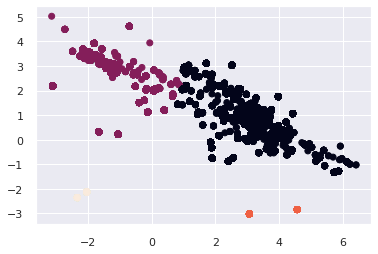

<Figure size 1440x1440 with 0 Axes>

In [132]:
plt.scatter(x=pca_feat[:,0], y=pca_feat[:,1], c=result['Clusters'], alpha=1)
plt.figure(figsize=(20,20))
plt.show()

In [133]:
avg_cluster = result.groupby(by='Clusters').mean()
avg_cluster.reset_index(inplace=True)
avg_cluster

,Clusters,totalAlreadyVaccinatedProvince,totalNotVaccinatedProvince,total_crowd_prov,avg_crowd_prov,safety_rate,retail_and_recreation_percent_change_from_baseline,grocery_and_pharmacy_percent_change_from_baseline,parks_percent_change_from_baseline,transit_stations_percent_change_from_baseline,workplaces_percent_change_from_baseline,residential_percent_change_from_baseline
0,0,-0.387009,-1.048274,-0.781993,-0.565275,-0.219552,1.136769,1.071679,1.060250,0.640704,0.392997,-0.463637
1,1,-0.598165,0.424077,-0.129571,-0.293070,-0.425800,-0.931619,-0.918498,-0.802032,-0.825848,-0.591881,0.694174
2,2,2.570877,-0.586905,-0.692180,-0.767332,4.349122,1.032208,1.210005,1.382179,1.567656,0.512314,-0.509267
3,3,1.199129,1.219165,1.747926,1.670356,0.230686,-0.573525,-0.519161,-0.740059,0.001275,0.244614,-0.301177


### **Radar chart**

In [134]:
from math import pi

def plot_radar_df(df, feat_cols, label_col, selected_label_list, split_chart=False, dpi=100, n_cols = 3, fig_h=8, fig_w=8):
    
    # min-max normalization
    for col in feat_cols:
        df[col] = (df[col] - df[col].min()) / (df[col].max() - df[col].min())
    
    # select data:
    row_idx = df[label_col].isin(selected_label_list)
    data = df[row_idx]
    data = data[feat_cols].values

    # number of variable
    N = len(feat_cols)

    # angle of each axis in the plot
    angles = [n / float(N) * 2 * pi for n in range(N)]
    angles += angles[:1]

    # set color
    my_color = plt.cm.get_cmap("Set2", len(df.index))

    # set font size and subplot
    if not split_chart:
        ax = plt.subplot(111, polar=True )
        size = 10
    else:
        size = 5
        dpi = 1.5*dpi

    for i in range(len(data)):

        title = label_col +'_' +str(selected_label_list[i])

        # Initialise the spider plot
        if split_chart:
            n_rows = np.ceil(len(df)/n_cols)
            ax = plt.subplot(n_rows,n_cols,i+1, polar=True )

        # If you want the first axis to be on top:
        ax.set_theta_offset(pi / 2)
        ax.set_theta_direction(-1)

        # Draw one axe per variable + add labels labels yet
        plt.xticks(angles[:-1], feat_cols, color='grey', size=int(size*0.8))

        # Draw ylabels
        ax.set_rlabel_position(0)
        plt.yticks([0.20, 0.4, 0.6, 0.8,  1], \
                   ["20%","40%","60%","80%","100%"], color="grey", size=size)
        plt.ylim(0,1)

        # Plot
        values = list(data[i,:])
        values += values[:1]
        ax.plot(angles, values, color=my_color(i), linewidth=2, linestyle='solid', label=title)
        ax.fill(angles, values, color=my_color(i), alpha=0.4)

        # Add a title or legend
        if split_chart:
            plt.title(title, size=11, color=my_color(i), y=1.2)
        else:
            plt.legend(loc='best', bbox_to_anchor=(0.1, 0.1))

        # Adjust DPI
        fig = plt.gcf()
        fig.set_dpi(dpi)
        fig.set_figheight(fig_h)
        fig.set_figwidth(fig_w)

    plt.tight_layout()
    plt.show()

In [135]:
avg_cluster.columns

Index(['Clusters', 'totalAlreadyVaccinatedProvince',
       'totalNotVaccinatedProvince', 'total_crowd_prov', 'avg_crowd_prov',
       'safety_rate', 'retail_and_recreation_percent_change_from_baseline',
       'grocery_and_pharmacy_percent_change_from_baseline',
       'parks_percent_change_from_baseline',
       'transit_stations_percent_change_from_baseline',
       'workplaces_percent_change_from_baseline',
       'residential_percent_change_from_baseline'],
      dtype='object')

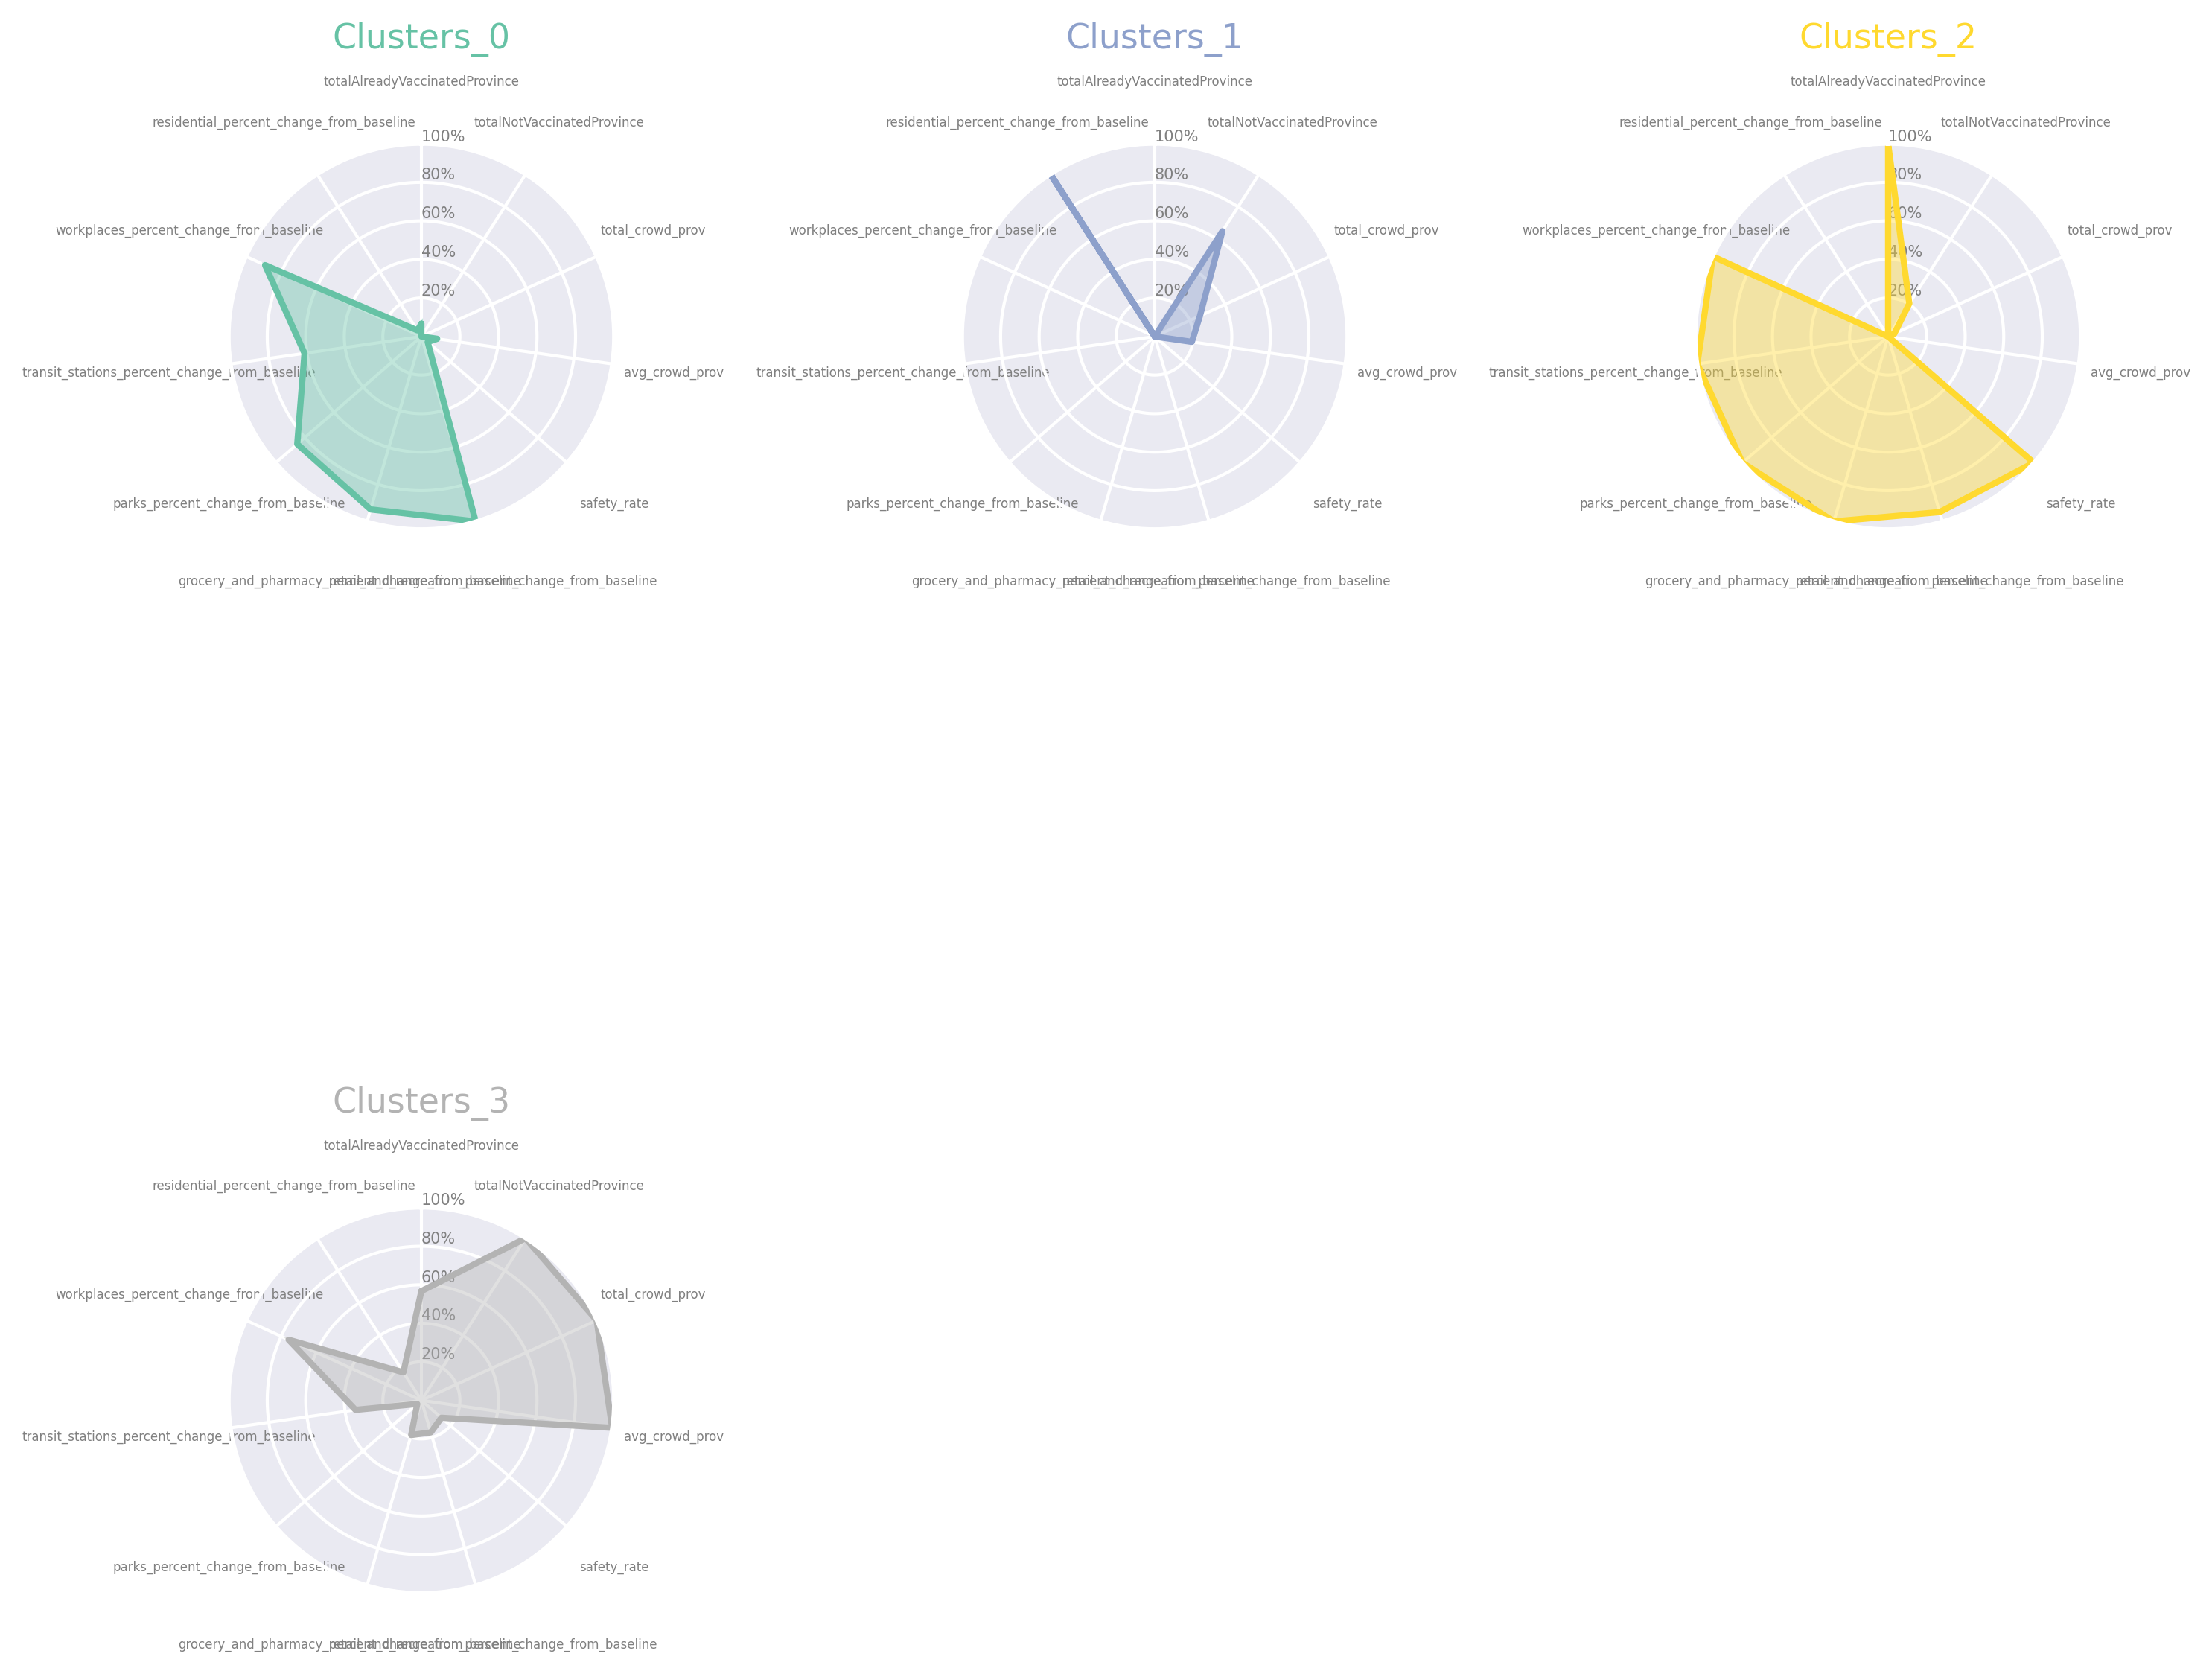

In [136]:
feat_cols = [
       'totalAlreadyVaccinatedProvince',
       'totalNotVaccinatedProvince', 'total_crowd_prov', 'avg_crowd_prov',
       'safety_rate', 'retail_and_recreation_percent_change_from_baseline',
       'grocery_and_pharmacy_percent_change_from_baseline',
       'parks_percent_change_from_baseline',
       'transit_stations_percent_change_from_baseline',
       'workplaces_percent_change_from_baseline',
       'residential_percent_change_from_baseline'
       ]

label_col = 'Clusters'
selected_label_list = [i for i in range(8)]

plot_radar_df(avg_cluster, feat_cols, label_col, selected_label_list, split_chart=True, dpi=200, n_cols=3, fig_h=10, fig_w=10)

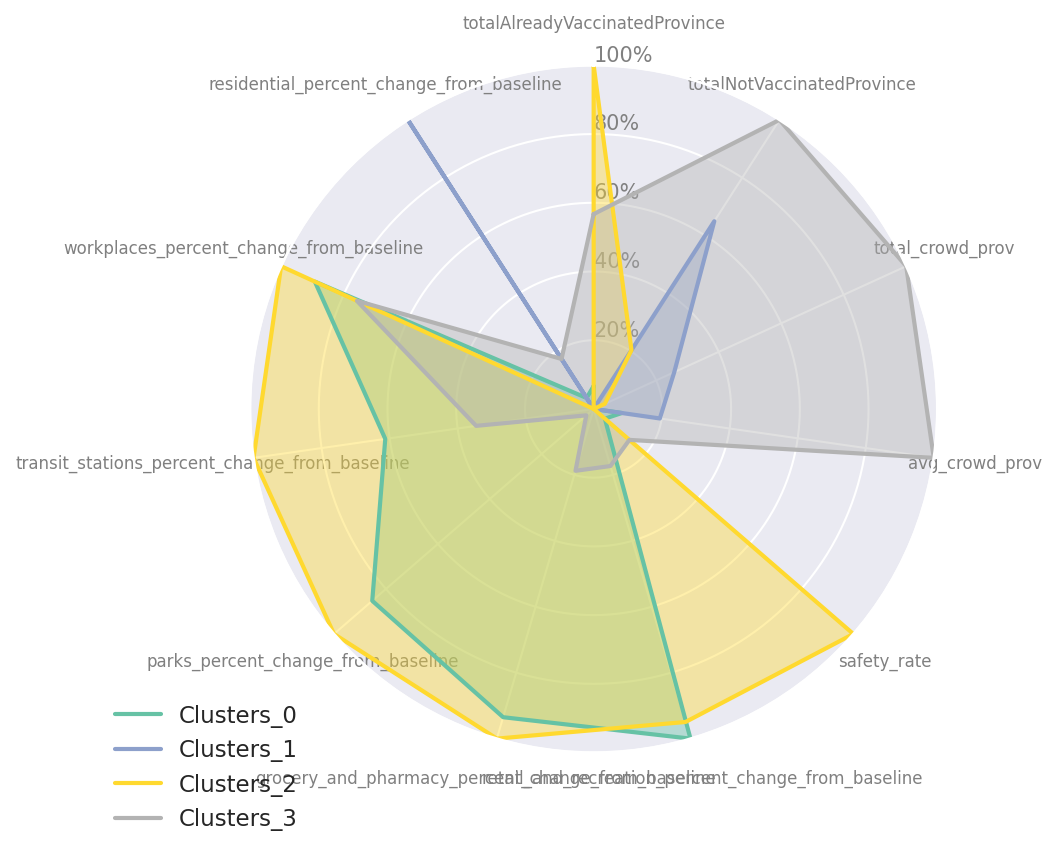

In [137]:
label_col = 'Clusters'
selected_label_list = [i for i in range(8)]

plot_radar_df(avg_cluster, feat_cols, label_col, selected_label_list, split_chart=False, dpi=150, n_cols=3, fig_h=7, fig_w=7)

* `Cluster 0` is ------------- 

    Rekomendation : 

* `Cluster 1` is ------------- 

    Rekomendation : 

* `Cluster 2` is ------------- 

    Rekomendation : 

* `Cluster 3` is ------------- 

    Rekomendation : 



* `Cluster 0` is ------------- 

    Rekomendation : 

* `Cluster 1` is ------------- 

    Rekomendation : 

* `Cluster 2` is ------------- 

    Rekomendation : 

* `Cluster 3` is ------------- 

    Rekomendation : 



* `Cluster 0` is ------------- 

    Rekomendation : 

* `Cluster 1` is ------------- 

    Rekomendation : 

* `Cluster 2` is ------------- 

    Rekomendation : 

* `Cluster 3` is ------------- 

    Rekomendation : 



# **Modelling data Peduli Lindungi [Only Province]**

`scanPeduliLindungiMobFix02.csv`

In [138]:
df_pl = pd.read_csv("scanPeduliLindungiMobFix02.csv")
df_pl

,createdAt,Provinsi,Column1,totalAlreadyVaccinatedProvince,totalNotVaccinatedProvince,vaksin_rate,total_crowd_prov,avg_crowd_prov,safety_rate,retail_and_recreation_percent_change_from_baseline,grocery_and_pharmacy_percent_change_from_baseline,parks_percent_change_from_baseline,transit_stations_percent_change_from_baseline,workplaces_percent_change_from_baseline,residential_percent_change_from_baseline
0,2021-07-03,BANTEN,282176,0.0,1.0,0.000000,1.0,1.000000,0.000000,-18.0,13.0,-17.0,-53.0,-20.0,15.0
1,2021-07-04,BANTEN,140402,0.0,5.0,0.000000,7.0,1.400000,0.000000,-21.0,9.0,-22.0,-55.0,-16.0,15.0
2,2021-07-04,BANTEN,701491,0.0,5.0,0.000000,7.0,1.400000,0.000000,-21.0,9.0,-22.0,-55.0,-16.0,15.0
3,2021-07-04,BANTEN,561964,0.0,5.0,0.000000,7.0,1.400000,0.000000,-21.0,9.0,-22.0,-55.0,-16.0,15.0
4,2021-07-04,BANTEN,562320,0.0,5.0,0.000000,7.0,1.400000,0.000000,-21.0,9.0,-22.0,-55.0,-16.0,15.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3609309,2021-08-23,BANTEN,144735,10021.0,85791.0,0.104590,663505610.0,6925.078383,1.447059,-3.0,7.0,1.0,-52.0,-22.0,12.0
3609310,2021-08-23,BANTEN,144594,10021.0,85791.0,0.104590,663505610.0,6925.078383,1.447059,-3.0,7.0,1.0,-52.0,-22.0,12.0
3609311,2021-08-23,BANTEN,144572,10021.0,85791.0,0.104590,663505610.0,6925.078383,1.447059,-3.0,7.0,1.0,-52.0,-22.0,12.0
3609312,2021-08-23,BANTEN,144232,10021.0,85791.0,0.104590,663505610.0,6925.078383,1.447059,-3.0,7.0,1.0,-52.0,-22.0,12.0


In [139]:
ambigu_column = ["Column1", "vaksin_rate"]
df_pl = df_pl.drop(ambigu_column,axis = 1)
df_pl.head()

,createdAt,Provinsi,totalAlreadyVaccinatedProvince,totalNotVaccinatedProvince,total_crowd_prov,avg_crowd_prov,safety_rate,retail_and_recreation_percent_change_from_baseline,grocery_and_pharmacy_percent_change_from_baseline,parks_percent_change_from_baseline,transit_stations_percent_change_from_baseline,workplaces_percent_change_from_baseline,residential_percent_change_from_baseline
0,2021-07-03,BANTEN,0.0,1.0,1.0,1.0,0.0,-18.0,13.0,-17.0,-53.0,-20.0,15.0
1,2021-07-04,BANTEN,0.0,5.0,7.0,1.4,0.0,-21.0,9.0,-22.0,-55.0,-16.0,15.0
2,2021-07-04,BANTEN,0.0,5.0,7.0,1.4,0.0,-21.0,9.0,-22.0,-55.0,-16.0,15.0
3,2021-07-04,BANTEN,0.0,5.0,7.0,1.4,0.0,-21.0,9.0,-22.0,-55.0,-16.0,15.0
4,2021-07-04,BANTEN,0.0,5.0,7.0,1.4,0.0,-21.0,9.0,-22.0,-55.0,-16.0,15.0


In [140]:
df_pl.columns

Index(['createdAt', 'Provinsi', 'totalAlreadyVaccinatedProvince',
       'totalNotVaccinatedProvince', 'total_crowd_prov', 'avg_crowd_prov',
       'safety_rate', 'retail_and_recreation_percent_change_from_baseline',
       'grocery_and_pharmacy_percent_change_from_baseline',
       'parks_percent_change_from_baseline',
       'transit_stations_percent_change_from_baseline',
       'workplaces_percent_change_from_baseline',
       'residential_percent_change_from_baseline'],
      dtype='object')

In [141]:
df_pl.rename(columns={'Provinsi': 'province'}, inplace=True)

In [142]:
df_pl["createdAt"] = pd.to_datetime(df_pl["createdAt"])

In [143]:
df_pl.columns

Index(['createdAt', 'province', 'totalAlreadyVaccinatedProvince',
       'totalNotVaccinatedProvince', 'total_crowd_prov', 'avg_crowd_prov',
       'safety_rate', 'retail_and_recreation_percent_change_from_baseline',
       'grocery_and_pharmacy_percent_change_from_baseline',
       'parks_percent_change_from_baseline',
       'transit_stations_percent_change_from_baseline',
       'workplaces_percent_change_from_baseline',
       'residential_percent_change_from_baseline'],
      dtype='object')

In [144]:
np.sort(df_pl['createdAt'].unique())

array(['2021-07-03T00:00:00.000000000', '2021-07-04T00:00:00.000000000',
       '2021-07-05T00:00:00.000000000', '2021-07-06T00:00:00.000000000',
       '2021-07-07T00:00:00.000000000', '2021-07-08T00:00:00.000000000',
       '2021-07-09T00:00:00.000000000', '2021-07-10T00:00:00.000000000',
       '2021-07-11T00:00:00.000000000', '2021-07-12T00:00:00.000000000',
       '2021-07-13T00:00:00.000000000', '2021-07-14T00:00:00.000000000',
       '2021-07-16T00:00:00.000000000', '2021-07-17T00:00:00.000000000',
       '2021-07-18T00:00:00.000000000', '2021-07-19T00:00:00.000000000',
       '2021-07-20T00:00:00.000000000', '2021-07-21T00:00:00.000000000',
       '2021-07-22T00:00:00.000000000', '2021-07-23T00:00:00.000000000',
       '2021-07-24T00:00:00.000000000', '2021-07-25T00:00:00.000000000',
       '2021-07-26T00:00:00.000000000', '2021-07-27T00:00:00.000000000',
       '2021-07-28T00:00:00.000000000', '2021-07-29T00:00:00.000000000',
       '2021-07-30T00:00:00.000000000', '2021-08-01

In [145]:
for province in np.unique(df_pl['province']):
  df_pl.loc[df_pl['province'] == province, ['province']] = province.capitalize()

In [146]:
df_pl.isna().sum()

createdAt                                             0
province                                              0
totalAlreadyVaccinatedProvince                        0
totalNotVaccinatedProvince                            0
total_crowd_prov                                      0
avg_crowd_prov                                        0
safety_rate                                           0
retail_and_recreation_percent_change_from_baseline    0
grocery_and_pharmacy_percent_change_from_baseline     0
parks_percent_change_from_baseline                    0
transit_stations_percent_change_from_baseline         0
workplaces_percent_change_from_baseline               0
residential_percent_change_from_baseline              0
dtype: int64

In [147]:
df_pl.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3609314 entries, 0 to 3609313
Data columns (total 13 columns):
 #   Column                                              Dtype         
---  ------                                              -----         
 0   createdAt                                           datetime64[ns]
 1   province                                            object        
 2   totalAlreadyVaccinatedProvince                      float64       
 3   totalNotVaccinatedProvince                          float64       
 4   total_crowd_prov                                    float64       
 5   avg_crowd_prov                                      float64       
 6   safety_rate                                         float64       
 7   retail_and_recreation_percent_change_from_baseline  float64       
 8   grocery_and_pharmacy_percent_change_from_baseline   float64       
 9   parks_percent_change_from_baseline                  float64       
 10  transit_stations_p

In [148]:
np.sort(df_pl["province"].unique())

array(['Aceh', 'Bali', 'Bangka belitung', 'Banten', 'Gorontalo',
       'Jakarta', 'Jambi', 'Jawa barat', 'Jawa tengah', 'Jawa timur',
       'Kalimantan barat', 'Kalimantan selatan', 'Kalimantan tengah',
       'Maluku', 'Nusa tenggara barat', 'Nusa tenggara timur', 'Papua',
       'Riau', 'Sulawesi selatan', 'Sulawesi tengah', 'Sulawesi tenggara',
       'Sulawesi utara', 'Sumatera barat', 'Sumatera selatan',
       'Sumatera utara', 'Yogyakarta'], dtype=object)

In [149]:
np.sort(df_pl["createdAt"].unique())

array(['2021-07-03T00:00:00.000000000', '2021-07-04T00:00:00.000000000',
       '2021-07-05T00:00:00.000000000', '2021-07-06T00:00:00.000000000',
       '2021-07-07T00:00:00.000000000', '2021-07-08T00:00:00.000000000',
       '2021-07-09T00:00:00.000000000', '2021-07-10T00:00:00.000000000',
       '2021-07-11T00:00:00.000000000', '2021-07-12T00:00:00.000000000',
       '2021-07-13T00:00:00.000000000', '2021-07-14T00:00:00.000000000',
       '2021-07-16T00:00:00.000000000', '2021-07-17T00:00:00.000000000',
       '2021-07-18T00:00:00.000000000', '2021-07-19T00:00:00.000000000',
       '2021-07-20T00:00:00.000000000', '2021-07-21T00:00:00.000000000',
       '2021-07-22T00:00:00.000000000', '2021-07-23T00:00:00.000000000',
       '2021-07-24T00:00:00.000000000', '2021-07-25T00:00:00.000000000',
       '2021-07-26T00:00:00.000000000', '2021-07-27T00:00:00.000000000',
       '2021-07-28T00:00:00.000000000', '2021-07-29T00:00:00.000000000',
       '2021-07-30T00:00:00.000000000', '2021-08-01

In [150]:
df_pl.shape

(3609314, 13)

## **Group By Province**

In [151]:
df_pl.columns

Index(['createdAt', 'province', 'totalAlreadyVaccinatedProvince',
       'totalNotVaccinatedProvince', 'total_crowd_prov', 'avg_crowd_prov',
       'safety_rate', 'retail_and_recreation_percent_change_from_baseline',
       'grocery_and_pharmacy_percent_change_from_baseline',
       'parks_percent_change_from_baseline',
       'transit_stations_percent_change_from_baseline',
       'workplaces_percent_change_from_baseline',
       'residential_percent_change_from_baseline'],
      dtype='object')

In [152]:
df_pl.groupby(['province']).agg(
    totalAlreadyVaccinatedProvince = ('totalAlreadyVaccinatedProvince', "sum"),
    totalNotVaccinatedProvince = ('totalNotVaccinatedProvince', "sum"),
    total_crowd_prov = ('total_crowd_prov', "sum"),
    retail_and_recreation_percent_change_from_baseline = ('retail_and_recreation_percent_change_from_baseline', "mean"),
    grocery_and_pharmacy_percent_change_from_baseline = ('grocery_and_pharmacy_percent_change_from_baseline', "mean"),
    parks_percent_change_from_baseline = ('parks_percent_change_from_baseline', "mean"),
    transit_stations_percent_change_from_baseline = ('transit_stations_percent_change_from_baseline', "mean"),
    workplaces_percent_change_from_baseline = ('workplaces_percent_change_from_baseline', "mean"),
    residential_percent_change_from_baseline = ('residential_percent_change_from_baseline', "mean")
)

,totalAlreadyVaccinatedProvince,totalNotVaccinatedProvince,total_crowd_prov,retail_and_recreation_percent_change_from_baseline,grocery_and_pharmacy_percent_change_from_baseline,parks_percent_change_from_baseline,transit_stations_percent_change_from_baseline,workplaces_percent_change_from_baseline,residential_percent_change_from_baseline
province,,,,,,,,,
Aceh,6.010000e+02,2.479400e+04,5.426426e+06,-3.056716,16.913433,-18.641791,-37.122388,-22.588060,-2.683582
Bali,1.186330e+06,2.012032e+07,1.472405e+10,-40.135886,-17.559717,-49.166186,-76.434892,-37.266103,13.648759
Bangka belitung,0.000000e+00,4.000000e+00,4.000000e+00,-18.000000,5.000000,-13.000000,-38.000000,-23.000000,3.000000
Banten,1.305255e+09,2.250429e+10,1.542657e+14,-4.609411,7.745725,0.380668,-51.668180,-20.081457,12.360877
Gorontalo,0.000000e+00,4.000000e+00,8.000000e+00,15.000000,32.000000,13.000000,0.000000,-12.000000,5.000000
Jakarta,1.059537e+10,6.407970e+11,7.214945e+15,-32.314648,-5.237987,-50.601097,-49.792733,-37.970001,14.733726
Jambi,4.520000e+02,5.471000e+03,2.515790e+05,-10.366906,24.359712,-13.625899,-41.302158,-25.338129,7.100719
Jawa barat,4.087719e+09,5.112578e+10,2.345112e+14,-11.390650,18.335179,1.637374,-30.899904,-21.491787,12.336413
Jawa tengah,4.900079e+07,1.970974e+09,7.087599e+12,-3.042236,18.981055,-3.739127,-29.031037,-22.984190,10.621224


In [153]:
df_pl_prov = df_pl.groupby(['province']).agg(
    totalAlreadyVaccinatedProvince = ('totalAlreadyVaccinatedProvince', "sum"),
    totalNotVaccinatedProvince = ('totalNotVaccinatedProvince', "sum"),
    total_crowd_prov = ('total_crowd_prov', "sum"),
    avg_crowd_prov = ('avg_crowd_prov', "mean"),
    retail_and_recreation_percent_change_from_baseline = ('retail_and_recreation_percent_change_from_baseline', "mean"),
    grocery_and_pharmacy_percent_change_from_baseline = ('grocery_and_pharmacy_percent_change_from_baseline', "mean"),
    parks_percent_change_from_baseline = ('parks_percent_change_from_baseline', "mean"),
    transit_stations_percent_change_from_baseline = ('transit_stations_percent_change_from_baseline', "mean"),
    workplaces_percent_change_from_baseline = ('workplaces_percent_change_from_baseline', "mean"),
    residential_percent_change_from_baseline = ('residential_percent_change_from_baseline', "mean")
).reset_index()

In [154]:
# df_pl_prov["vaksin_rate"] = df_pl_prov["totalAlreadyVaccinatedProvince"]/(df_pl_prov["totalAlreadyVaccinatedProvince"]+df_pl_prov["totalNotVaccinatedProvince"])

In [155]:
df_pl_prov['safety_rate'] = df_pl_prov['totalAlreadyVaccinatedProvince']/df_pl_prov['avg_crowd_prov']

In [156]:
new_columns = ['province', 'totalAlreadyVaccinatedProvince',
       'totalNotVaccinatedProvince', 'total_crowd_prov',
       'avg_crowd_prov', 'safety_rate',
       'retail_and_recreation_percent_change_from_baseline',
       'grocery_and_pharmacy_percent_change_from_baseline',
       'parks_percent_change_from_baseline',
       'transit_stations_percent_change_from_baseline',
       'workplaces_percent_change_from_baseline',
       'residential_percent_change_from_baseline']

df_pl_prov = df_pl_prov[new_columns]
# df_pl_prov=df_pl_prov.reindex(columns=new_columns)

In [157]:
df_pl_prov.head()

,province,totalAlreadyVaccinatedProvince,totalNotVaccinatedProvince,total_crowd_prov,avg_crowd_prov,safety_rate,retail_and_recreation_percent_change_from_baseline,grocery_and_pharmacy_percent_change_from_baseline,parks_percent_change_from_baseline,transit_stations_percent_change_from_baseline,workplaces_percent_change_from_baseline,residential_percent_change_from_baseline
0,Aceh,6.010000e+02,2.479400e+04,5.426426e+06,243.576119,2.467401,-3.056716,16.913433,-18.641791,-37.122388,-22.588060,-2.683582
1,Bali,1.186330e+06,2.012032e+07,1.472405e+10,483.978901,2451.201895,-40.135886,-17.559717,-49.166186,-76.434892,-37.266103,13.648759
2,Bangka belitung,0.000000e+00,4.000000e+00,4.000000e+00,1.000000,0.000000,-18.000000,5.000000,-13.000000,-38.000000,-23.000000,3.000000
3,Banten,1.305255e+09,2.250429e+10,1.542657e+14,5844.269592,223339.308788,-4.609411,7.745725,0.380668,-51.668180,-20.081457,12.360877
4,Gorontalo,0.000000e+00,4.000000e+00,8.000000e+00,2.000000,0.000000,15.000000,32.000000,13.000000,0.000000,-12.000000,5.000000


In [158]:
df_pl_prov.shape

(26, 12)

In [159]:
df_pl_prov.isna().sum()

province                                              0
totalAlreadyVaccinatedProvince                        0
totalNotVaccinatedProvince                            0
total_crowd_prov                                      0
avg_crowd_prov                                        0
safety_rate                                           0
retail_and_recreation_percent_change_from_baseline    0
grocery_and_pharmacy_percent_change_from_baseline     0
parks_percent_change_from_baseline                    0
transit_stations_percent_change_from_baseline         0
workplaces_percent_change_from_baseline               0
residential_percent_change_from_baseline              0
dtype: int64

In [160]:
df_pl_prov["safety_rate"] = df_pl_prov["safety_rate"].fillna(0)

In [161]:
print(f"Data Frame Dimension Before Duplicate Removal: {df_pl_prov.shape}")
df_pl_prov = df_pl_prov.drop_duplicates()
print(f"Data Frame Dimension After Duplicate Removal: {df_pl_prov.shape}")

Data Frame Dimension Before Duplicate Removal: (26, 12)
Data Frame Dimension After Duplicate Removal: (26, 12)


## **Clustering K-Means**

**Importing Library**

In [162]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score,silhouette_samples
std=StandardScaler()

Standard Scaling since K-Means Clustering is a distance based alogrithm. 

In general, attribute scaling is important to be applied with K-means. Most of the time, the standard Euclidean distance is used (as a distance function of K-means) with the assumption that the attributes are normalized. 

In [163]:
X=df_pl_prov[['totalAlreadyVaccinatedProvince',
       'totalNotVaccinatedProvince', 'total_crowd_prov',
       'avg_crowd_prov', 'safety_rate',
       'retail_and_recreation_percent_change_from_baseline',
       'grocery_and_pharmacy_percent_change_from_baseline',
       'parks_percent_change_from_baseline',
       'transit_stations_percent_change_from_baseline',
       'workplaces_percent_change_from_baseline',
       'residential_percent_change_from_baseline']]
#Standard Scaling since K-Means Clustering is a distance based alogrithm
X=std.fit_transform(X)

**Calculating k numbers using Elbow and Silhouette**

In [164]:
wcss=[]
sil=[]
for i in range(2,11):
    clf=KMeans(n_clusters=i,init='k-means++',random_state=42)
    clf.fit(X)
    labels=clf.labels_
    centroids=clf.cluster_centers_
    sil.append(silhouette_score(X, labels, metric='euclidean'))
    wcss.append(clf.inertia_)

**Importing Visualization Library**

*   Matplotlib adalah pustaka visualisasi data multiplatform yang dibangun di atas array NumPy

*   NumPy (Numerical Python) adalah library Python yang fokus pada scientific computing. 

In [165]:
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

Text(0.5, 1.0, 'Silhouette Score Method')

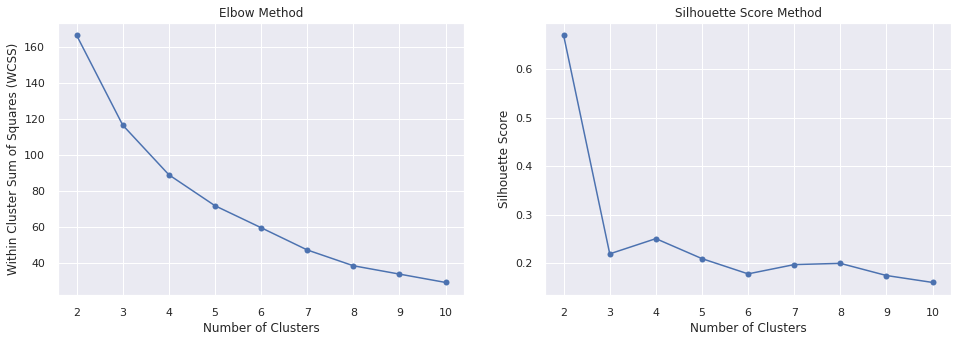

In [166]:
fig, (ax1, ax2) = plt.subplots(1, 2,figsize=(16,5))
x=np.arange(2,11)
ax1.plot(x,wcss,marker='o')
ax1.set_xlabel("Number of Clusters")
ax1.set_ylabel("Within Cluster Sum of Squares (WCSS)")
ax1.set_title("Elbow Method")
x=np.arange(2,11)
ax2.plot(x,sil,marker='o')
ax2.set_xlabel("Number of Clusters")
ax2.set_ylabel("Silhouette Score")
ax2.set_title("Silhouette Score Method")

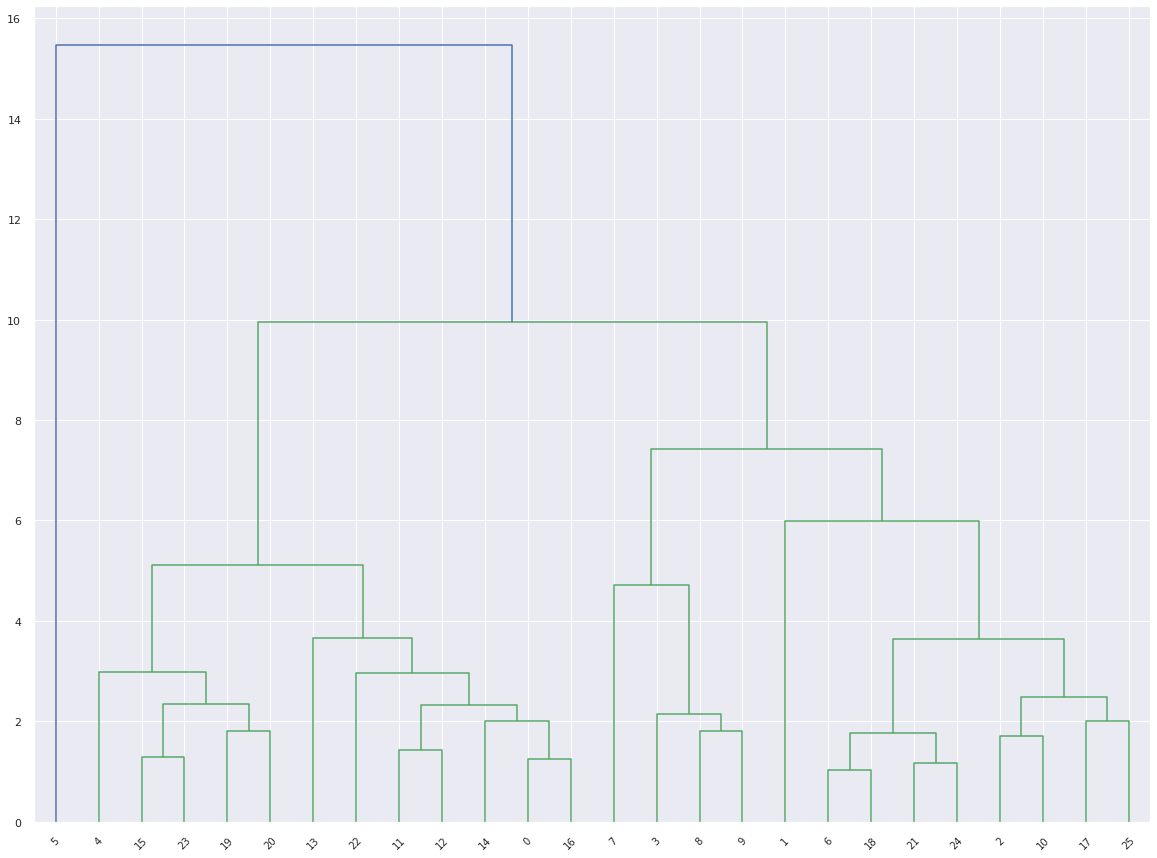

In [167]:
import scipy.cluster.hierarchy as sch
plt.figure(figsize=(20,15))
dendogram=sch.dendrogram(sch.linkage(X, method  = "ward"))

In [168]:
clf_final=KMeans(n_clusters=2,init='k-means++',random_state=6)
clf_final.fit(X)

KMeans(n_clusters=2, random_state=6)

In [169]:
df_pl_prov["Clusters"]=clf_final.predict(X)

**Summary of Clusters**

In [170]:
df_pl_prov["Clusters"].value_counts()

0    25
1     1
Name: Clusters, dtype: int64

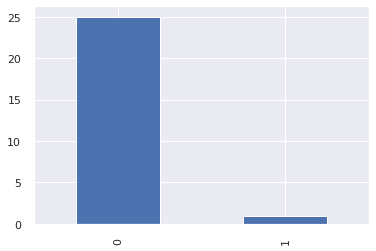

In [171]:
df_pl_prov.Clusters.value_counts().plot.bar()

In [172]:
cluster_summary=pd.concat([
                           df_pl_prov[df_pl_prov["Clusters"]==1].head(15),
                           df_pl_prov[df_pl_prov["Clusters"]==0].head(15)])
cluster_summary.style.background_gradient(cmap='Reds')

,province,totalAlreadyVaccinatedProvince,totalNotVaccinatedProvince,total_crowd_prov,avg_crowd_prov,safety_rate,retail_and_recreation_percent_change_from_baseline,grocery_and_pharmacy_percent_change_from_baseline,parks_percent_change_from_baseline,transit_stations_percent_change_from_baseline,workplaces_percent_change_from_baseline,residential_percent_change_from_baseline,Clusters
5,Jakarta,10595367713.000000,640797030439.000000,7214945380392629.000000,9946.721989,1065212.009064,-32.314648,-5.237987,-50.601097,-49.792733,-37.970001,14.733726,1
0,Aceh,601.000000,24794.000000,5426426.000000,243.576119,2.467401,-3.056716,16.913433,-18.641791,-37.122388,-22.588060,-2.683582,0
1,Bali,1186330.000000,20120319.000000,14724053357.000000,483.978901,2451.201895,-40.135886,-17.559717,-49.166186,-76.434892,-37.266103,13.648759,0
2,Bangka belitung,0.000000,4.000000,4.000000,1.000000,0.000000,-18.000000,5.000000,-13.000000,-38.000000,-23.000000,3.000000,0
3,Banten,1305255131.000000,22504290635.000000,154265666755752.000000,5844.269592,223339.308788,-4.609411,7.745725,0.380668,-51.668180,-20.081457,12.360877,0
4,Gorontalo,0.000000,4.000000,8.000000,2.000000,0.000000,15.000000,32.000000,13.000000,0.000000,-12.000000,5.000000,0
6,Jambi,452.000000,5471.000000,251579.000000,38.352518,11.785406,-10.366906,24.359712,-13.625899,-41.302158,-25.338129,7.100719,0
7,Jawa barat,4087719441.000000,51125777567.000000,234511234782162.000000,3817.453912,1070797.325840,-11.390650,18.335179,1.637374,-30.899904,-21.491787,12.336413,0
8,Jawa tengah,49000791.000000,1970974431.000000,7087599228709.000000,3173.043279,15442.837269,-3.042236,18.981055,-3.739127,-29.031037,-22.984190,10.621224,0
9,Jawa timur,802865040.000000,49400558017.000000,332411853068995.000000,6187.930871,129746.931030,-9.873224,16.588200,-11.243473,-38.687929,-26.391570,9.730891,0


### **totalAlreadyVaccinatedProvince**

In [173]:
print("Average totalAlreadyVaccinatedProvince of Cluster 0: ",df_pl_prov[df_pl_prov["Clusters"]==0]["totalAlreadyVaccinatedProvince"].mean())
print("Average totalAlreadyVaccinatedProvince of Cluster 1: ",df_pl_prov[df_pl_prov["Clusters"]==1]["totalAlreadyVaccinatedProvince"].mean())

Average totalAlreadyVaccinatedProvince of Cluster 0:  249958107.24
Average totalAlreadyVaccinatedProvince of Cluster 1:  10595367713.0


### **totalNotVaccinatedProvince**

In [174]:
print("Average totalNotVaccinatedProvince of Cluster 0: ",df_pl_prov[df_pl_prov["Clusters"]==0]["totalNotVaccinatedProvince"].mean())
print("Average totalNotVaccinatedProvince of Cluster 1: ",df_pl_prov[df_pl_prov["Clusters"]==1]["totalNotVaccinatedProvince"].mean())

Average totalNotVaccinatedProvince of Cluster 0:  5001715253.72
Average totalNotVaccinatedProvince of Cluster 1:  640797030439.0


### **vaksin_rate**

In [175]:
# print("Average vaksin_rate of Cluster 0: ",df_pl_prov[df_pl_prov["Clusters"]==0]["vaksin_rate"].mean())
# print("Average vaksin_rate of Cluster 1: ",df_pl_prov[df_pl_prov["Clusters"]==1]["vaksin_rate"].mean())

### **total_crowd_prov**

In [176]:
print("Average total_crowd_prov of Cluster 0: ",df_pl_prov[df_pl_prov["Clusters"]==0]["total_crowd_prov"].mean())
print("Average total_crowd_prov of Cluster 1: ",df_pl_prov[df_pl_prov["Clusters"]==1]["total_crowd_prov"].mean())

Average total_crowd_prov of Cluster 0:  29132116057984.52
Average total_crowd_prov of Cluster 1:  7214945380392629.0


### **avg_crowd_prov**

In [177]:
print("Average avg_crowd_prov of Cluster 0: ",df_pl_prov[df_pl_prov["Clusters"]==0]["avg_crowd_prov"].mean())
print("Average avg_crowd_prov of Cluster 1: ",df_pl_prov[df_pl_prov["Clusters"]==1]["avg_crowd_prov"].mean())

Average avg_crowd_prov of Cluster 0:  864.3735089857738
Average avg_crowd_prov of Cluster 1:  9946.721988526811


### **safety_rate**

In [178]:
print("Average safety_rate of Cluster 0: ",df_pl_prov[df_pl_prov["Clusters"]==0]["safety_rate"].mean())
print("Average safety_rate of Cluster 1: ",df_pl_prov[df_pl_prov["Clusters"]==1]["safety_rate"].mean())

Average safety_rate of Cluster 0:  57960.053597356025
Average safety_rate of Cluster 1:  1065212.0090640292


### **retail_and_recreation_percent_change_from_baseline**

In [179]:
print("Average retail_and_recreation_percent_change_from_baseline of Cluster 0: ",df_pl_prov[df_pl_prov["Clusters"]==0]["retail_and_recreation_percent_change_from_baseline"].mean())
print("Average retail_and_recreation_percent_change_from_baseline of Cluster 1: ",df_pl_prov[df_pl_prov["Clusters"]==1]["retail_and_recreation_percent_change_from_baseline"].mean())

Average retail_and_recreation_percent_change_from_baseline of Cluster 0:  -8.748986417487647
Average retail_and_recreation_percent_change_from_baseline of Cluster 1:  -32.314647881946435


### **grocery_and_pharmacy_percent_change_from_baseline**

In [180]:
print("Average grocery_and_pharmacy_percent_change_from_baseline of Cluster 0: ",df_pl_prov[df_pl_prov["Clusters"]==0]["grocery_and_pharmacy_percent_change_from_baseline"].mean())
print("Average grocery_and_pharmacy_percent_change_from_baseline of Cluster 1: ",df_pl_prov[df_pl_prov["Clusters"]==1]["grocery_and_pharmacy_percent_change_from_baseline"].mean())

Average grocery_and_pharmacy_percent_change_from_baseline of Cluster 0:  16.87610756834847
Average grocery_and_pharmacy_percent_change_from_baseline of Cluster 1:  -5.2379865605253615


### **parks_percent_change_from_baseline**

In [181]:
print("Average parks_percent_change_from_baseline of Cluster 0: ",df_pl_prov[df_pl_prov["Clusters"]==0]["parks_percent_change_from_baseline"].mean())
print("Average parks_percent_change_from_baseline of Cluster 1: ",df_pl_prov[df_pl_prov["Clusters"]==1]["parks_percent_change_from_baseline"].mean())

Average parks_percent_change_from_baseline of Cluster 0:  -13.890529660186601
Average parks_percent_change_from_baseline of Cluster 1:  -50.60109672985511


### **transit_stations_percent_change_from_baseline**

In [182]:
print("Average transit_stations_percent_change_from_baseline of Cluster 0: ",df_pl_prov[df_pl_prov["Clusters"]==0]["transit_stations_percent_change_from_baseline"].mean())
print("Average transit_stations_percent_change_from_baseline of Cluster 1: ",df_pl_prov[df_pl_prov["Clusters"]==1]["transit_stations_percent_change_from_baseline"].mean())

Average transit_stations_percent_change_from_baseline of Cluster 0:  -35.67955399522677
Average transit_stations_percent_change_from_baseline of Cluster 1:  -49.79273285226123


### **workplaces_percent_change_from_baseline**

In [183]:
print("Average workplaces_percent_change_from_baseline of Cluster 0: ",df_pl_prov[df_pl_prov["Clusters"]==0]["workplaces_percent_change_from_baseline"].mean())
print("Average workplaces_percent_change_from_baseline of Cluster 1: ",df_pl_prov[df_pl_prov["Clusters"]==1]["workplaces_percent_change_from_baseline"].mean())

Average workplaces_percent_change_from_baseline of Cluster 0:  -22.906355018726195
Average workplaces_percent_change_from_baseline of Cluster 1:  -37.970000763606514


### **residential_percent_change_from_baseline**

In [184]:
print("Average residential_percent_change_from_baseline of Cluster 0: ",df_pl_prov[df_pl_prov["Clusters"]==0]["residential_percent_change_from_baseline"].mean())
print("Average residential_percent_change_from_baseline of Cluster 1: ",df_pl_prov[df_pl_prov["Clusters"]==1]["residential_percent_change_from_baseline"].mean())

Average residential_percent_change_from_baseline of Cluster 0:  6.000977157984913
Average residential_percent_change_from_baseline of Cluster 1:  14.733726113433747


In [185]:
import seaborn as sns

Seaborn merupakan pustaka visualisasi data pada lingkungan Python ber- sifat sumber terbuka yang berlisensi BSD dan dibangun di atas pustaka matplotlib. Seaborn akan mempermudah kita sebagai analis data untuk memproduksi visualisasi yang indah tanpa kostumisasi rumit seperti yang kita hadapi pada matplotlib.

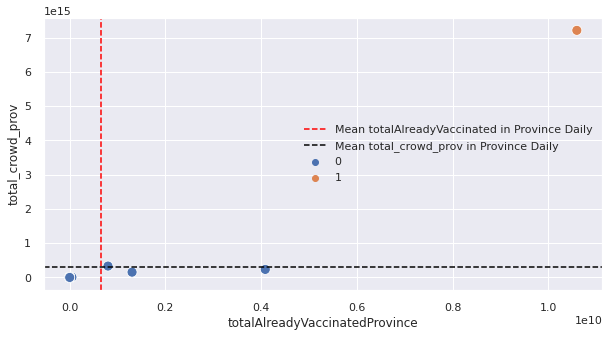

In [186]:
plt.figure(figsize=(10,5))
sns.scatterplot(x=df_pl_prov["totalAlreadyVaccinatedProvince"],y=df_pl_prov["total_crowd_prov"],hue=df_pl_prov["Clusters"],s=100)
plt.axvline((df_pl_prov["totalAlreadyVaccinatedProvince"]).mean(),color='red',linestyle="--",label="Mean totalAlreadyVaccinated in Province Daily")
plt.axhline((df_pl_prov["total_crowd_prov"]).mean(),color='black',linestyle="--",label="Mean total_crowd_prov in Province Daily")
plt.legend()

In [187]:
# plt.figure(figsize=(10,5))
# sns.scatterplot(x=df_pl_prov["vaksin_rate"],y=df_pl_prov["safety_rate"],hue=df_pl_prov["Clusters"],s=100)
# plt.axvline((df_pl_prov["vaksin_rate"]).mean(),color='red',linestyle="--",label="Mean vaksin_rate in Province Daily")
# plt.axhline((df_pl_prov["safety_rate"]).mean(),color='black',linestyle="--",label="Mean safety_rate in Province Daily")
# plt.legend()

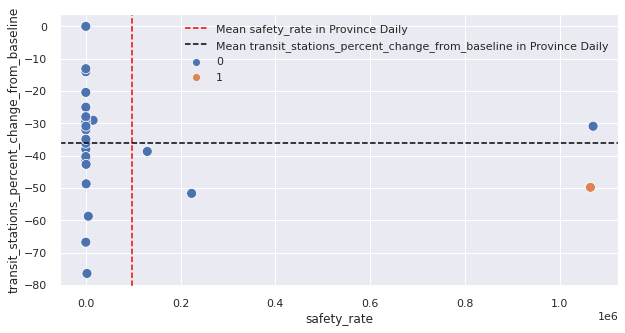

In [188]:
plt.figure(figsize=(10,5))
sns.scatterplot(x=df_pl_prov["safety_rate"],y=df_pl_prov["transit_stations_percent_change_from_baseline"],hue=df_pl_prov["Clusters"],s=100)
plt.axvline((df_pl_prov["safety_rate"]).mean(),color='red',linestyle="--",label="Mean safety_rate in Province Daily")
plt.axhline((df_pl_prov["transit_stations_percent_change_from_baseline"]).mean(),color='black',linestyle="--",label="Mean transit_stations_percent_change_from_baseline in Province Daily")
plt.legend()

In [189]:
print("Few Province belonging to Cluster 0: ",str(set(df_pl_prov[df_pl_prov["Clusters"]==0].head(10).province)))
print("Few Province belonging to Cluster 1: ",str(set(df_pl_prov[df_pl_prov["Clusters"]==1].head(10).province)))

Few Province belonging to Cluster 0:  {'Aceh', 'Bali', 'Jawa barat', 'Kalimantan barat', 'Banten', 'Gorontalo', 'Jawa tengah', 'Jambi', 'Bangka belitung', 'Jawa timur'}
Few Province belonging to Cluster 1:  {'Jakarta'}


### **PCA**

In [190]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
result = df_pl_prov.copy()
columns = ['totalAlreadyVaccinatedProvince',
       'totalNotVaccinatedProvince', 'total_crowd_prov',
       'avg_crowd_prov', 'safety_rate',
       'retail_and_recreation_percent_change_from_baseline',
       'grocery_and_pharmacy_percent_change_from_baseline',
       'parks_percent_change_from_baseline',
       'transit_stations_percent_change_from_baseline',
       'workplaces_percent_change_from_baseline',
       'residential_percent_change_from_baseline']
for i in columns:
  result[i] = sc.fit_transform(result[[i]])

In [191]:
from sklearn.decomposition import PCA
# reduce dimension
pca = PCA(n_components=2)
pca_feat = pca.fit_transform(result[columns])
pca_feat

array([[-1.14633911,  0.19455981],
       [ 3.23671436,  4.53621557],
       [-0.25476585,  0.99937643],
       [ 0.95391026, -0.64634295],
       [-3.10484595, -2.67210626],
       [10.12416935, -3.16223536],
       [-0.49286543,  0.43059353],
       [ 1.84913223, -2.41211741],
       [-0.39818449, -0.59614614],
       [ 1.04690955, -0.53767594],
       [ 0.63739877,  1.92782811],
       [-0.77044121,  0.09725443],
       [-0.94500829,  0.04507188],
       [-1.63129412, -0.49076759],
       [-1.42249405, -0.13933869],
       [-1.82475108, -1.28656533],
       [-1.04765957,  0.17303782],
       [ 0.602179  ,  2.16865098],
       [-0.27459995,  0.58841886],
       [-1.95786466, -1.11605059],
       [-2.44690439, -1.68016103],
       [ 0.23835284,  1.01098497],
       [-0.92946187,  0.02437056],
       [-1.26514989, -0.45068189],
       [ 0.01949034,  0.82951491],
       [ 1.2043732 ,  2.16431133]])

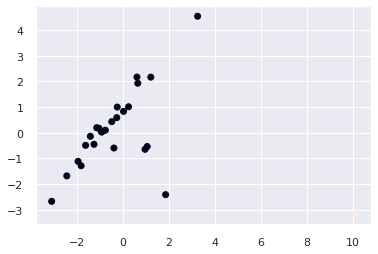

<Figure size 1440x1440 with 0 Axes>

In [192]:
plt.scatter(x=pca_feat[:,0], y=pca_feat[:,1], c=result['Clusters'], alpha=1)
plt.figure(figsize=(20,20))
plt.show()

In [193]:
avg_cluster = result.groupby(by='Clusters').mean()
avg_cluster.reset_index(inplace=True)
avg_cluster

,Clusters,totalAlreadyVaccinatedProvince,totalNotVaccinatedProvince,total_crowd_prov,avg_crowd_prov,safety_rate,retail_and_recreation_percent_change_from_baseline,grocery_and_pharmacy_percent_change_from_baseline,parks_percent_change_from_baseline,transit_stations_percent_change_from_baseline,workplaces_percent_change_from_baseline,residential_percent_change_from_baseline
0,0,-0.184898,-0.198741,-0.199662,-0.141387,-0.136148,0.080331,0.064595,0.081014,0.033672,0.094847,-0.068095
1,1,4.622439,4.968531,4.991556,3.534667,3.403693,-2.008264,-1.614871,-2.025346,-0.841798,-2.371176,1.702381


### **Radar chart**

In [194]:
from math import pi

def plot_radar_df(df, feat_cols, label_col, selected_label_list, split_chart=False, dpi=100, n_cols = 3, fig_h=8, fig_w=8):
    
    # min-max normalization
    for col in feat_cols:
        df[col] = (df[col] - df[col].min()) / (df[col].max() - df[col].min())
    
    # select data:
    row_idx = df[label_col].isin(selected_label_list)
    data = df[row_idx]
    data = data[feat_cols].values

    # number of variable
    N = len(feat_cols)

    # angle of each axis in the plot
    angles = [n / float(N) * 2 * pi for n in range(N)]
    angles += angles[:1]

    # set color
    my_color = plt.cm.get_cmap("Set2", len(df.index))

    # set font size and subplot
    if not split_chart:
        ax = plt.subplot(111, polar=True )
        size = 10
    else:
        size = 5
        dpi = 1.5*dpi

    for i in range(len(data)):

        title = label_col +'_' +str(selected_label_list[i])

        # Initialise the spider plot
        if split_chart:
            n_rows = np.ceil(len(df)/n_cols)
            ax = plt.subplot(n_rows,n_cols,i+1, polar=True )

        # If you want the first axis to be on top:
        ax.set_theta_offset(pi / 2)
        ax.set_theta_direction(-1)

        # Draw one axe per variable + add labels labels yet
        plt.xticks(angles[:-1], feat_cols, color='grey', size=int(size*0.8))

        # Draw ylabels
        ax.set_rlabel_position(0)
        plt.yticks([0.20, 0.4, 0.6, 0.8,  1], \
                   ["20%","40%","60%","80%","100%"], color="grey", size=size)
        plt.ylim(0,1)

        # Plot
        values = list(data[i,:])
        values += values[:1]
        ax.plot(angles, values, color=my_color(i), linewidth=2, linestyle='solid', label=title)
        ax.fill(angles, values, color=my_color(i), alpha=0.4)

        # Add a title or legend
        if split_chart:
            plt.title(title, size=11, color=my_color(i), y=1.2)
        else:
            plt.legend(loc='best', bbox_to_anchor=(0.1, 0.1))

        # Adjust DPI
        fig = plt.gcf()
        fig.set_dpi(dpi)
        fig.set_figheight(fig_h)
        fig.set_figwidth(fig_w)

    plt.tight_layout()
    plt.show()

In [195]:
avg_cluster.columns

Index(['Clusters', 'totalAlreadyVaccinatedProvince',
       'totalNotVaccinatedProvince', 'total_crowd_prov', 'avg_crowd_prov',
       'safety_rate', 'retail_and_recreation_percent_change_from_baseline',
       'grocery_and_pharmacy_percent_change_from_baseline',
       'parks_percent_change_from_baseline',
       'transit_stations_percent_change_from_baseline',
       'workplaces_percent_change_from_baseline',
       'residential_percent_change_from_baseline'],
      dtype='object')

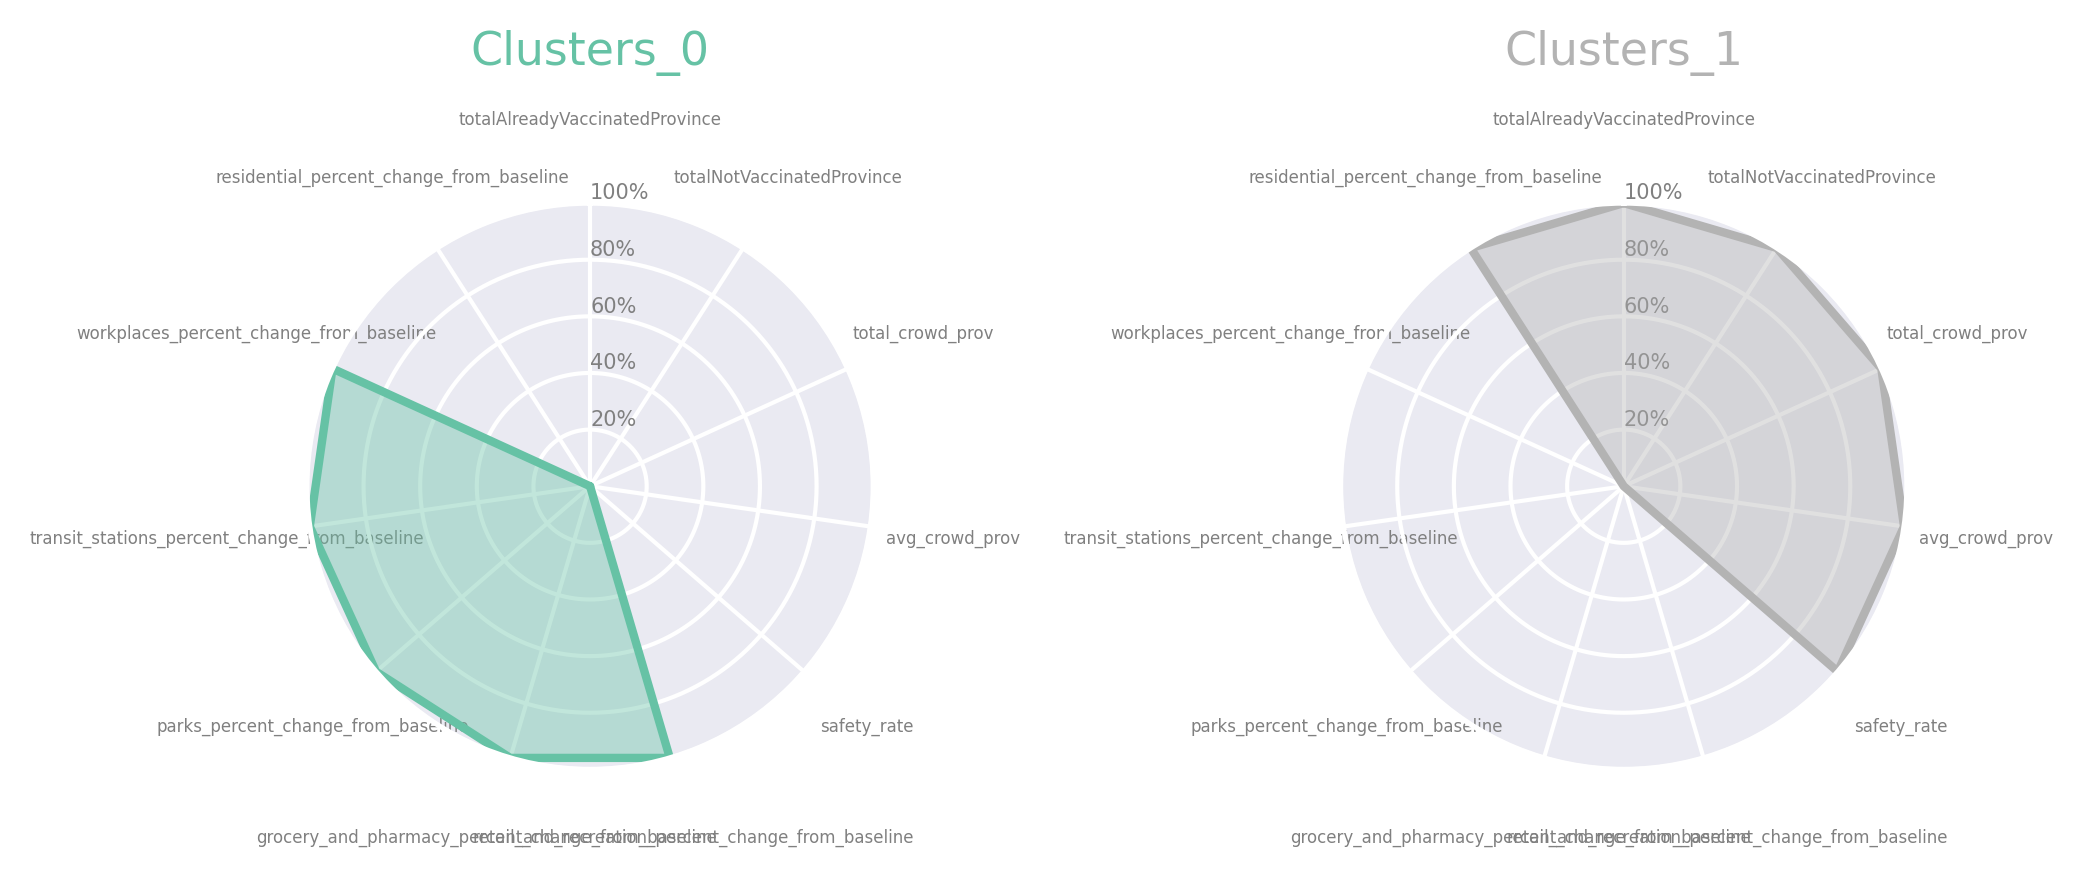

In [196]:
feat_cols = [
       'totalAlreadyVaccinatedProvince',
       'totalNotVaccinatedProvince', 'total_crowd_prov', 'avg_crowd_prov',
       'safety_rate', 'retail_and_recreation_percent_change_from_baseline',
       'grocery_and_pharmacy_percent_change_from_baseline',
       'parks_percent_change_from_baseline',
       'transit_stations_percent_change_from_baseline',
       'workplaces_percent_change_from_baseline',
       'residential_percent_change_from_baseline'
       ]

label_col = 'Clusters'
selected_label_list = [i for i in range(8)]

plot_radar_df(avg_cluster, feat_cols, label_col, selected_label_list, split_chart=True, dpi=200, n_cols=3, fig_h=10, fig_w=10)

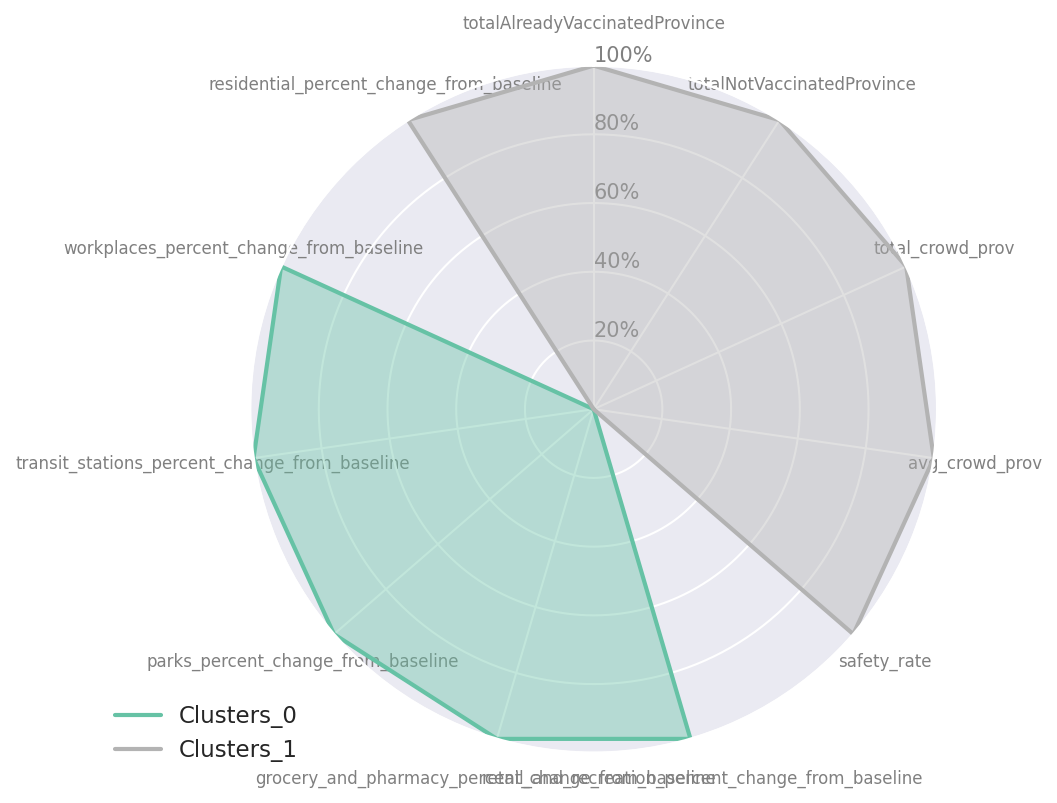

In [197]:
label_col = 'Clusters'
selected_label_list = [i for i in range(8)]

plot_radar_df(avg_cluster, feat_cols, label_col, selected_label_list, split_chart=False, dpi=150, n_cols=3, fig_h=7, fig_w=7)

* `Cluster 0` is ------------- 

    Rekomendation : 

* `Cluster 1` is ------------- 

    Rekomendation : 

* `Cluster 2` is ------------- 

    Rekomendation : 

* `Cluster 3` is ------------- 

    Rekomendation : 

